# Lending Club Case Study - Exploratory  Data Analysis



## Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 


Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

# Notes

- Remove rows with current loan status
- loan_amnt, funded_amnt, funded_amnt_inv
- Consider only loan_amnt - because need to decide before approval
- Data Understanding
- Data cleaning
- Data Analysis
- Recommendations 
- Data Cleaning
- Check the percentage of missing values
- Drop columns with high percentage of missing values
- Perform imputations for less missing percentage values columns (Identify correct metric)
- Median for outliers and mean for no outliers and mode for categorical data
- Drop rows where the missing percentage is quite high

- Drop columns having single value as data as it has no influence on the decision

- For interest rate values are like 6.5%, do data cleaning and convert it into float data
- For Employment length create your own rule and mention the assumptions (required float datatype)

- Don't use variables which shows the behaviour of the applicants during the loan period
- Use only variables that are presented when the applications was made

- Three types of variables
- - related to the applicant (demographic variables such as age, occupation, employment details, etc)
- - Loan characteristics (amount of loan, interest rate, purpose of loan etc)
- - Customer behavior (those which are generated after the loan is approved)

- Customer behavior are not available at the time of loan application, thus they cannot be used as predictors
- Loan status with current to be removed and tag other two as 0 and 1 for easy and clean analysis
- Use cusotmer behavior data for others/past loan of the applicants collected from bureau orgs, drop current loan customer behavior

### Few important variables

- loan amnt
- term
- interest rate
- grade
- subgrade
- annual income
- purpose of loan
- DTI (Debt to income)
- Emp_length
- Loan_Date (Month)
- Home_Ownership
- Verification_status 
- - Income Verified (pay slips, tax returns) 
- - Income source verified (1st party vendors has checked) 
- - Not verified

### Customer behavior variables

- delinq_2yrs
- earlies_cr_line
- inq_last_6mnths
- open_acc
- pub_rec
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

- Customer behavior variables are not available at the time of loan application and cannot be used as predictors
- variables such as acc_now_delinq, chargeoff_with_12months etc (which are related to the applicants past loans) are avaiable from the credit bureau

- Skip Description Variable (Need NLP)


## Importing Necessary Libraries

- Pandas for reading, writing and manipulating csv data
- Numpy for numerical calculations
- Matplotlib and Seaborn for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## Reading the CSV file

In [2]:
df = pd.read_csv('loan/loan.csv')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

Removing column id and member id as it has no signficance in predicting whether the applicant will default or not

In [3]:
del df['id']
del df['member_id']

Lisnting all the columns

In [4]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=109)

Printing all the information, shape and metrics of the dataframe

In [5]:
print(df.info())
print(df.shape)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 109 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(74), int64(11), object(24)
memory usage: 33.0+ MB
None
(39717, 109)


loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868    324.561922   
std     7456.670694   7187.238670      7128.450439    208.874874   
min      500.000000    500.000000         0.000000     15.690000   
25%     5500.000000   5400.000000      5000.000000    167.020000   
50%    10000.000000   9600.000000      8975.000000    280.220000   
75%    15000.000000  15000.000000     14400.000000    430.780000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  3.971700e+04  39717.000000  39717.000000    39717.000000   
mean   6.896893e+04     13.315130      0.146512        0.869200   
std    6.379377e+04      6.678594      0.491812        1.070219   
min    4.000000e+03      0.000000      0.000000        0.000000   
25%    4.040400e+04      8.170000      0.000000        0.000000   
50%    5.900000e+04     13.400000      0.000000        1.000000   
75%    8.230000e+04     18.600000      0.000000        1.000000   
max    6.000000e+06     29.990000     11.000000        8.000000   

       mths_since_last_delinq  mths_since_last_record  ...  \
count            14035.000000             2786.000000  ...   
mean                35.900962               69.698134  ...   
std                 22.020060               43.822529  ...   
min                  0.000000                0.000000  ...   
25%                 18.000000               22.000000  ...   
50%                 34.000000               90.000000  ...   
75%                 52.000000              104.000000  ...   
max                120.000000              129.000000  ...   

       num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count                 0.0                 0.0             0.0   
mean                  NaN                 NaN             NaN   
std                   NaN                 NaN             NaN   
min                   NaN                 NaN             NaN   
25%                   NaN                 NaN             NaN   
50%                   NaN                 NaN             NaN   
75%                   NaN                 NaN             NaN   
max                   NaN                 NaN             NaN   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
count               0.0          39020.000000    39678.0              0.0   
mean                NaN              0.043260        0.0              NaN   
std                 NaN              0.204324        0.0              NaN   
min                 NaN              0.000000        0.0              NaN   
25%                 NaN              0.000000        0.0              NaN   
50%                 NaN              0.000000        0.0              NaN   
75%                 NaN              0.000000        0.0              NaN   
max                 NaN              2.000000        0.0              NaN   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
count                0.0             0.0                         0.0  
mean                 NaN             NaN                         NaN  
std                  NaN             NaN                         NaN  
min                  NaN             NaN                         NaN  
25%                  NaN             NaN                         NaN  
50%                  NaN             NaN                         NaN  
75%                  NaN             NaN                         NaN  
max                  NaN             NaN                         NaN  

[8 rows x 85 columns]

## Data Cleaning

Finding all the columns having missing values

In [6]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 109, dtype: int64

Finding columns with missing values with their respective percentage

In [7]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 6.19130347206486% missing values
emp_length has 2.7066495455346598% missing values
desc has 32.58050708764509% missing values
title has 0.02769594883802995% missing values
mths_since_last_delinq has 64.66248709620567% missing values
mths_since_last_record has 92.98537150338646% missing values
revol_util has 0.12589067653649977% missing values
last_pymnt_d has 0.17876476068182967% missing values
next_pymnt_d has 97.12969257496789% missing values
last_credit_pull_d has 0.005035627061459991% missing values
collections_12_mths_ex_med has 0.14099755772087974% missing values
mths_since_last_major_derog has 100.0% missing values
annual_inc_joint has 100.0% missing values
dti_joint has 100.0% missing values
verification_status_joint has 100.0% missing values
tot_coll_amt has 100.0% missing values
tot_cur_bal has 100.0% missing values
open_acc_6m has 100.0% missing values
open_il_6m has 100.0% missing values
open_il_12m has 100.0% missing valu

Dropping all the columns having more than 50% missing values

In [8]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: mths_since_last_delinq, mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, 



Printing information and shape of the dataframe after dropping columns having more than 50% missing values

In [9]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

Printing all the columns having missing values less than 50% out of the remaining 52 columns

In [10]:
# print(df.isnull().sum())

# print('\n')

print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 6.19130347206486% missing values
emp_length has 2.7066495455346598% missing values
desc has 32.58050708764509% missing values
title has 0.02769594883802995% missing values
revol_util has 0.12589067653649977% missing values
last_pymnt_d has 0.17876476068182967% missing values
last_credit_pull_d has 0.005035627061459991% missing values
collections_12_mths_ex_med has 0.14099755772087974% missing values
chargeoff_within_12_mths has 0.14099755772087974% missing values
pub_rec_bankruptcies has 1.75491603091875% missing values
tax_liens has 0.09819472769846982% missing values


### Handling each columns with missing values

Dropping column 'desc' which has loan description provided by the borrower as it contains large string and would require text processing and NLP to extract meaningful insight

In [11]:
df = df.drop('desc',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

Analyzing 'emp_title' column in order to find if it is useful or not for EDA

In [13]:
print(df['emp_title'].value_counts())
print(df['emp_title'].unique())

print(len(df['emp_title'].unique()))

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
28821


- Skipping emp_title has it has to many unqiue values (more than 28000) and would require text processing

Analyzing 'emp_length' column in order to find if it is useful or not for EDA

In [14]:
print(df['emp_length'].value_counts())
print(df['emp_length'].unique())

print(len(df['emp_length'].unique()))

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
12


In [15]:
df['emp_length'].isnull().sum() / len(df) * 100

2.7066495455346575

Removing records for which emp_length is null as it just 2% of the entire data
We could impute the records by find the mode and replacing it with the null values but decided not to as it may create bias

In [16]:
df = df[~df['emp_length'].isnull()]

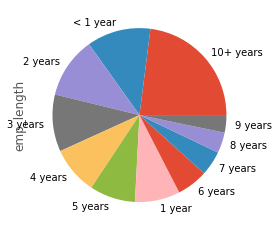

In [17]:
df['emp_length'].value_counts().plot.pie()
plt.show()

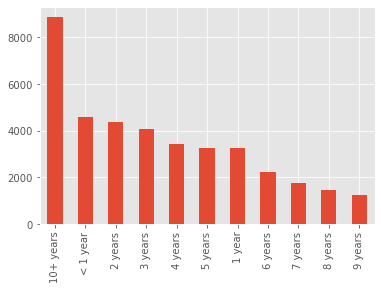

In [18]:
df['emp_length'].value_counts().plot.bar()
plt.show()

Analyzing 'title' column in order to find if it is useful or not for EDA


In [19]:
print(df['title'].value_counts())
print(df['title'].unique())

print(len(df['title'].unique()))


Debt Consolidation             2144
Debt Consolidation Loan        1691
Personal Loan                   641
Consolidation                   511
debt consolidation              486
                               ... 
Shannon's personal loan           1
credit card finally gone!!!       1
Taxes 2011                        1
Dc                                1
JAL Loan                          1
Name: title, Length: 19148, dtype: int64
['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
19149


- Skipping title has it has to many unqiue values (more than 19000) and would require text processing

In [20]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [21]:
print(df['pub_rec_bankruptcies'].value_counts())
print(df['pub_rec_bankruptcies'].unique())
print(df['pub_rec_bankruptcies'].isnull().sum())

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
[ 0.  1.  2. nan]
697


Dropping records having null values for column 'pub_rec_bankruptcies' as it just 1% of the entire data
We could fill the null values by using the mode but since the value 0 bankruptices occured is more than 35000 it would have no signfinance adding 697 more records

In [22]:
df['pub_rec_bankruptcies'].isnull().sum() / len(df) * 100

1.8037368666218103

In [23]:
df = df[~df['pub_rec_bankruptcies'].isnull()]

Printing all the columns having missing values

In [24]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 3.681644485439449% missing values
title has 0.026353933324557488% missing values
revol_util has 0.12386348662538182% missing values
last_pymnt_d has 0.17393595994201405% missing values
last_credit_pull_d has 0.0026353933324543277% missing values
collections_12_mths_ex_med has 0.0052707866649086554% missing values
chargeoff_within_12_mths has 0.0052707866649086554% missing values


Printing all the columns having number of unique values

In [25]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
pymnt_plan                        1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
term                              2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       49
issue_d                          52
total_acc                        81
last_credit_pull_d               97
last_pymnt_d                     97
int_rate                    

- Dropping columns having just one unique value
- Dropping columns having customer behavior after the loan has been sanctioned 
- Dropping columns having requirement of complex text processing
- Dropping columns like URL which have no signfinance in predicting if the applicant will default
- Keeping columns which are available at the time of application not the columns which are indicating behavior after the loan is sanctioned

In [26]:
columnsToRemove = ['tax_liens','delinq_amnt',
                   'chargeoff_within_12_mths','acc_now_delinq',
                   'application_type','pymnt_plan','policy_code',
                   'initial_list_status','collections_12_mths_ex_med',
                   'url','total_pymnt',
                   'total_pymnt_inv','total_rec_int',
                   'last_pymnt_amnt','revol_bal',
                   'funded_amnt_inv','total_rec_prncp',
                   'recoveries', 'collection_recovery_fee',
                   'total_rec_late_fee','out_prncp_inv',
                   'out_prncp', 'revol_util',
                   'funded_amnt','last_pymnt_d',
                   'last_credit_pull_d', 'issue_d',
                   'title', 'emp_title']

In [27]:
df = df.drop(columnsToRemove,axis=1)

Printing the information of the dataframe after data cleaning

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37945 non-null  int64  
 1   term                  37945 non-null  object 
 2   int_rate              37945 non-null  object 
 3   installment           37945 non-null  float64
 4   grade                 37945 non-null  object 
 5   sub_grade             37945 non-null  object 
 6   emp_length            37945 non-null  object 
 7   home_ownership        37945 non-null  object 
 8   annual_inc            37945 non-null  float64
 9   verification_status   37945 non-null  object 
 10  loan_status           37945 non-null  object 
 11  purpose               37945 non-null  object 
 12  zip_code              37945 non-null  object 
 13  addr_state            37945 non-null  object 
 14  dti                   37945 non-null  float64
 15  delinq_2yrs        

We are left with 22 columns including our target column 'loan_status' to analyze and perform EDA 

In [29]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

## Analysis

### Defining Helper function for Analysis

In [30]:
def handle_outliers(df,colname):
    
    """Handles Outliers by removing values below 0.01 quantile and above 0.99 quantile value
    Returns:
        [DataFrame]: [Cleaned Dataframe]
    """
    
    q_low = df[colname].quantile(0.01)
    q_hi = df[colname].quantile(0.99)

    df = df[(df[colname] < q_hi) & (df[colname] > q_low)]
    
    return df

Function to analyze categorical columns

In [31]:
def analyze_categorical(df, colname, plotsize_x = 15, plotsize_y = 15):
    
    """
    Generates basic information and plots for the given column
    """
    
    print("Value Count for " + colname)
    print("\n")
    print(df[colname].value_counts())   
    print("-----------------------------------------------------")
    print("Describe for groupby values of loan_status and " + colname)
    print("\n")
    print(df.groupby(['loan_status'])[colname].describe())
    print("-----------------------------------------------------")
    print("Value Count for groupby series of loan_status and " + colname)
    print("\n")
    print(df.groupby(['loan_status'])[colname].value_counts())
        
    colname_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = colname,
               values = "loan_amnt",
               aggfunc = np.median)
    print("-----------------------------------------------------")
    print("Pivot table values with index as loan_status, column as " + colname + " and values of loan_amnt with aggfunc of median")
    print("\n")
    print(colname_amnt.head())
    print("-----------------------------------------------------")
    print("\n")
    
    plt.figure(figsize=[plotsize_x,plotsize_y])
    
    plt.subplot(2,2,1)
    df[colname].value_counts().plot.pie()
    plt.title("Pie Chart for column " + colname)
    
    plt.subplot(2,2,2)
    df[colname].value_counts().plot.bar()
    plt.title("Bar Chart for column " + colname)
    
    plt.subplot(2,2,3)
    # sns.barplot(df.groupby(['loan_status'])[colname].value_counts())
    df.groupby(['loan_status'])[colname].value_counts().plot.bar()
    plt.title("Bar Chart between loan_status and " + colname)
    
    plt.suptitle("Plots for " + colname)
    plt.show()
    
    plt.figure(figsize=[plotsize_x,plotsize_y])
    colname_amnt.plot.bar().legend(bbox_to_anchor=(1.0, 1.0))
    plt.title("Bar chart between loan_status and " + colname + "w.r.t to loan_amnt")
    
    plt.show()
    

Function to analyze numnerical columns

In [32]:

def analyze_numerical(df,colname,heatmap = True,plotsize_x = 10,plotsize_y = 10):
    """
    Generates basic information and plots for the given column
    """
    
    print("Value Count for " + colname)
    print("\n")
    print(df[colname].value_counts())
    print("-----------------------------------------------------")
    print("Describe for " + colname)
    print("\n")
    print(df[colname].describe())
    print("-----------------------------------------------------")
    print("Value Count for groupby series of loan_status and " + colname)
    print("\n")
    print(df.groupby(['loan_status'])[colname].describe())
    print("-----------------------------------------------------")
    
    sns.boxplot(df[colname])
    plt.title("Boxplot for " + colname)
    plt.show()
    
    sns.displot(df[colname])
    plt.title("Distplot for " + colname)
    plt.show()
    
    plt.figure(figsize=[plotsize_x,plotsize_y])
    
    plt.subplot(2,2,1)
    df.groupby(['loan_status'])[colname].median().plot.bar()
    plt.title("Bar Chart between loan_status and " + colname + "for aggfunc median", fontsize = 10)
    plt.subplot(2,2,2)
    df.groupby(['loan_status'])[colname].mean().plot.bar()
    plt.title("Bar Chart between loan_status and " + colname + "for aggfunc mean", fontsize = 10)
    plt.subplot(2,2,3)
    df.groupby(['loan_status'])[colname].min().plot.bar()
    plt.title("Bar Chart between loan_status and " + colname + "for aggfunc min", fontsize = 10)
    plt.subplot(2,2,4)
    df.groupby(['loan_status'])[colname].max().plot.bar()
    plt.title("Bar Chart between loan_status and " + colname + "for aggfunc max", fontsize = 10)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    
    plt.figure(figsize=[plotsize_x,plotsize_y])
    plt.subplot(1,2,1)
    sns.barplot(data=df, x = 'loan_status', y=colname, estimator= np.median)
    plt.title("Bar Chart between loan_status and " + colname + "for aggfunc median", fontsize = 10)
    plt.subplot(1,2,2)
    sns.boxplot(df['loan_status'],df[colname])
    plt.title("Boxplot between loan_status and " + colname, fontsize = 10)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    
    if heatmap:
        df[colname + '_bucket'] = pd.qcut(df[colname] , 5, ['VL','L','M', 'H', 'VH'])
        hm_colname = pd.pivot_table(data = df,
                index = "loan_status",
                columns = colname + '_bucket',
                values = colname,
                aggfunc = np.median)
        print("-----------------------------------------------------")
        print("Pivot table values with index as loan_status, column as " + colname + " and values of loan_amnt with aggfunc of median")
        print("\n")
        print(hm_colname.info())
        print(hm_colname.describe())
        print(hm_colname.head())
        print(hm_colname.value_counts())
        print("-----------------------------------------------------")
        
        plt.figure(figsize=[plotsize_x,plotsize_y])
        sns.heatmap(hm_colname,cmap="Greens",annot=True)
        plt.show()
        plt.figure(figsize=[plotsize_x,plotsize_y])
        hm_colname.plot.bar().legend(bbox_to_anchor=(1.0, 1.0))
        plt.show()

Outlier handling for column annual income

In [33]:
df = handle_outliers(df,'annual_inc')

In [34]:
df['loan_status'].isnull().sum()

0

Printing the unique values present and their count

In [35]:
df['loan_status'].value_counts()

Fully Paid     30935
Charged Off     5153
Current         1083
Name: loan_status, dtype: int64

Dropping records containing values 'Current' or loan status as current as this applicants cannot help us to understand whether the new applicant will default or not.
Assuming 'Current' as the applicants are currently paying back to the Lending club and are not declared as Charged off or Fully Paid applicants

In [36]:
df.drop(df.index[df['loan_status'] == 'Current'], inplace = True)

In [37]:
df['loan_status'].value_counts()

Fully Paid     30935
Charged Off     5153
Name: loan_status, dtype: int64

In [38]:
df.shape

(36088, 22)

In [89]:
charge_off_percent = round((5153 / 36088) * 100,2)
print("Out of 36088 applicants " + str(charge_off_percent) + "% applicants were declared as Charged Off")

Out of 36088 applicants 14.28% applicants were declared as Charged Off


### Out of 36088 applicants <b>14.28%</b> applicants were declared as Charged Off by Lending Club

Plotting pie chart and bar chart in order to represent charge off applicants and fully paid applicants

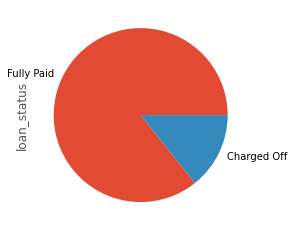

In [40]:
df['loan_status'].value_counts().plot.pie()
plt.show()

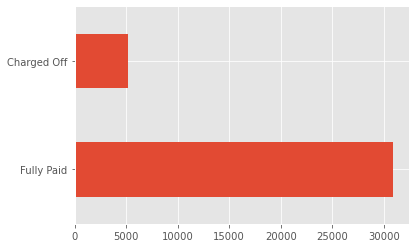

In [41]:
df['loan_status'].value_counts().plot.barh()
plt.show()

In [96]:
print(9109/36088)
print(2859/9109)
print(2294/9109)
print(24120/26979)
print(6815/26979)

0.252410773664376
0.31386540783840156
0.2518388407069931
0.8940286889803181
0.2526038770895882


- Only 25.24% of the applicants took term of 60 months
- Almost equal number of applicants were declared charged off for both the terms (36 and 60 months).
- Out off all the charged off 31.38% opted for 36 months and 25.18% opted for 60 months
- Whereass 89.40 Fully Paid applicants opted for 36 months
- There is high chance of applicant defaulting if it opted for 60 months term but it can be entirely true as the data for charged off applicant is less
- Term can be used as one of the deciding factor but not only the factor for rejecting applicants application

Value Count for term


 36 months    26979
 60 months     9109
Name: term, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and term


             count unique         top   freq
loan_status                                 
Charged Off   5153      2   36 months   2859
Fully Paid   30935      2   36 months  24120
-----------------------------------------------------
Value Count for groupby series of loan_status and term


loan_status  term      
Charged Off   36 months     2859
              60 months     2294
Fully Paid    36 months    24120
              60 months     6815
Name: term, dtype: int64
-----------------------------------------------------
Pivot table values with index as loan_status, column as term and values of loan_amnt with aggfunc of median


term          36 months   60 months
loan_status                        
Charged Off        8000       15000
Fully Paid         8000       14500
------------------------

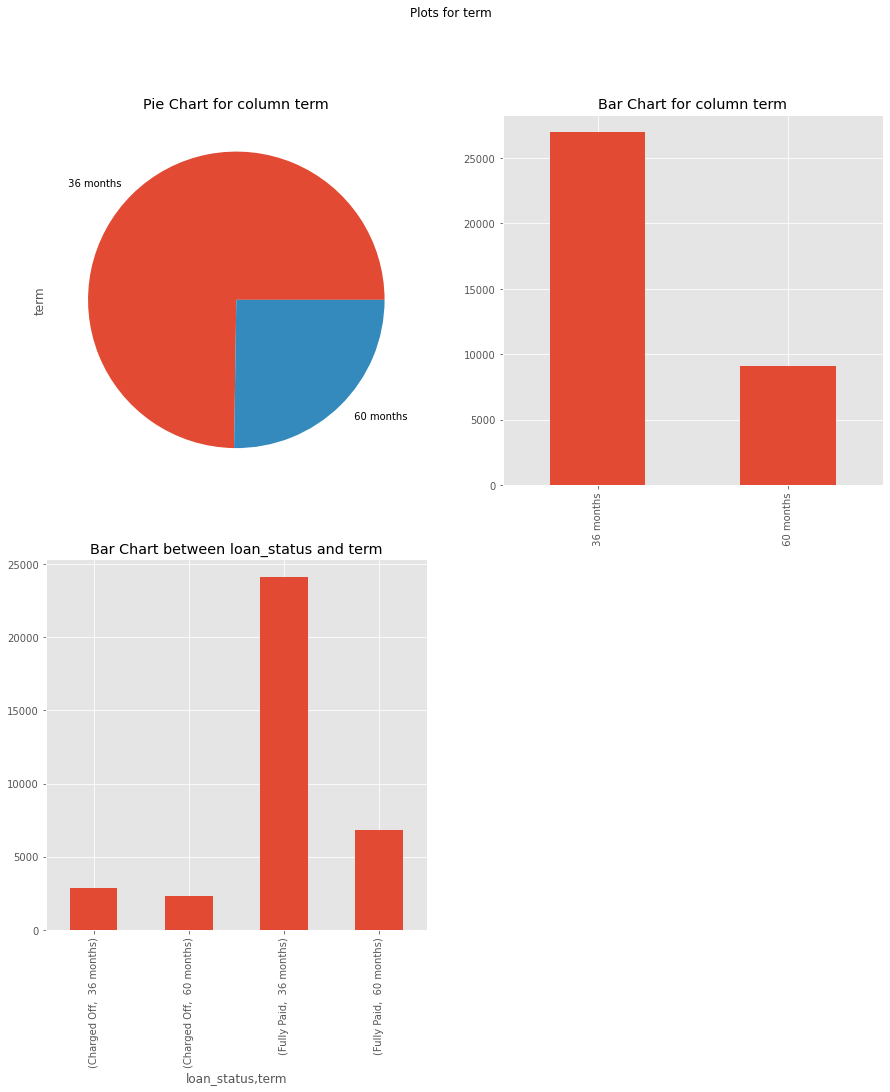

<Figure size 1080x1080 with 0 Axes>

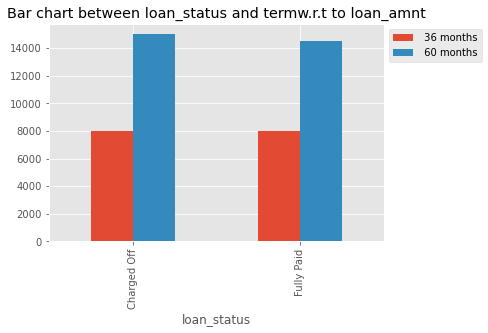

In [42]:
analyze_categorical(df,'term')

Value Count for grade


B    10944
A     9359
C     7324
D     4745
E     2512
F      918
G      286
Name: grade, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and grade


             count unique top  freq
loan_status                        
Charged Off   5153      7   B  1297
Fully Paid   30935      7   B  9647
-----------------------------------------------------
Value Count for groupby series of loan_status and grade


loan_status  grade
Charged Off  B        1297
             C        1228
             D        1023
             E         671
             A         536
             F         300
             G          98
Fully Paid   B        9647
             A        8823
             C        6096
             D        3722
             E        1841
             F         618
             G         188
Name: grade, dtype: int64
-----------------------------------------------------
Pivot table values with index a

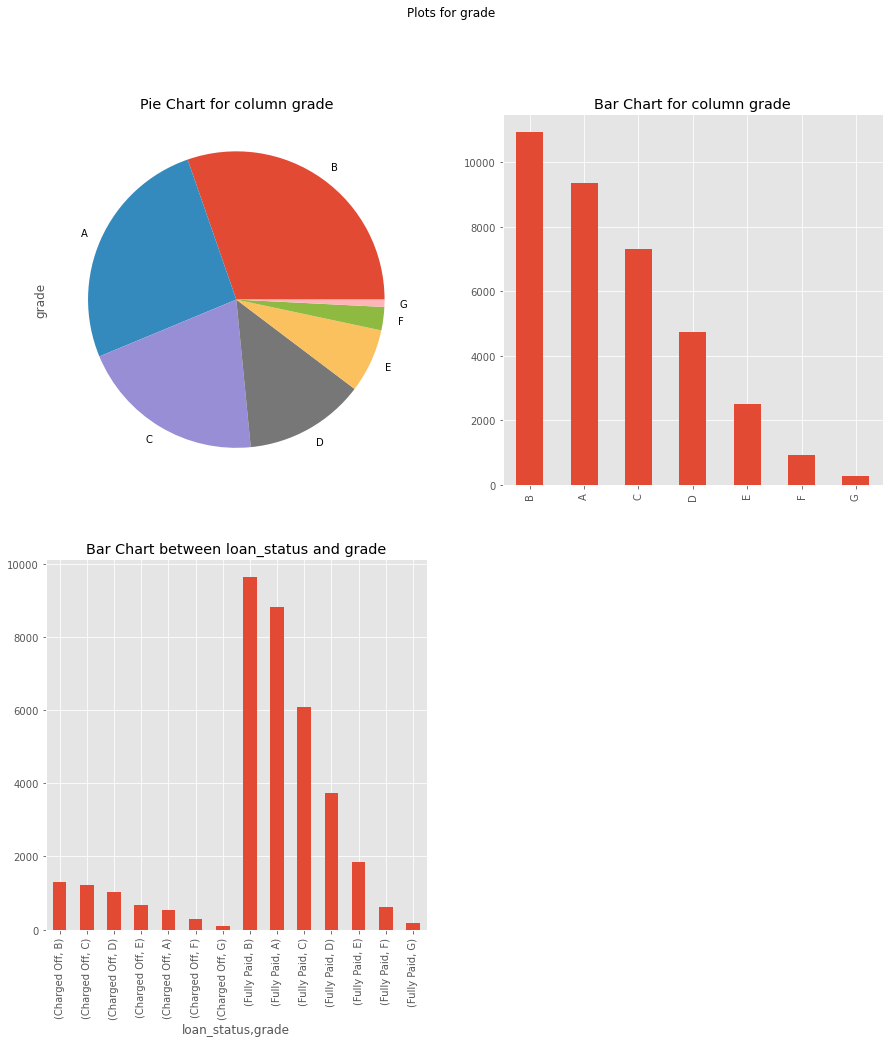

<Figure size 1080x1080 with 0 Axes>

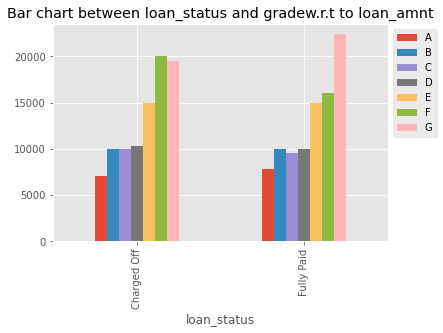

In [43]:
analyze_categorical(df,'grade')

In [44]:
df['sub_grade'].value_counts()

A4    2718
B3    2652
A5    2551
B5    2479
B4    2307
C1    1919
B2    1860
C2    1826
A3    1673
B1    1646
A2    1391
C3    1386
D2    1200
C4    1123
C5    1070
D3    1045
A1    1026
D1     863
D4     856
D5     781
E1     686
E2     581
E3     486
E4     404
E5     355
F1     291
F2     221
F3     161
F4     141
F5     104
G1      90
G2      74
G4      51
G3      44
G5      27
Name: sub_grade, dtype: int64

<AxesSubplot:ylabel='sub_grade'>

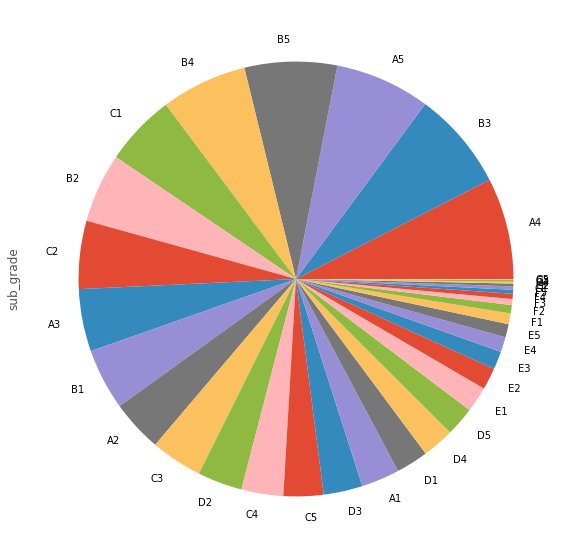

In [45]:
plt.figure(figsize=[10,10])
df['sub_grade'].value_counts().plot.pie()

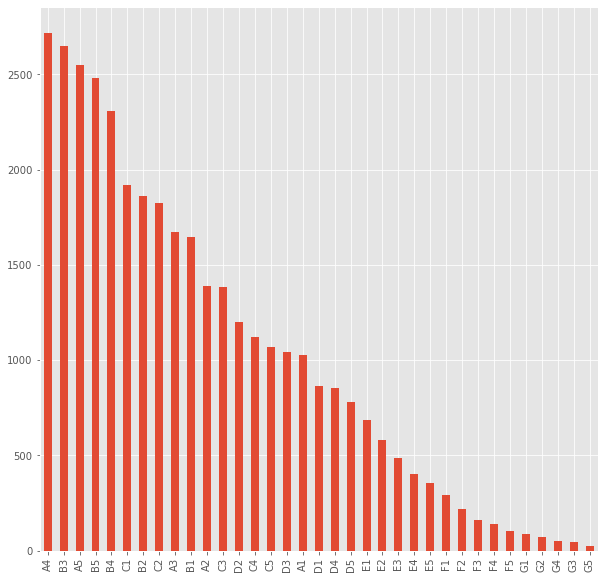

In [46]:
plt.figure(figsize=[10,10])
df['sub_grade'].value_counts().plot.bar()
plt.show()

In [47]:
df.groupby(['loan_status'])['sub_grade'].describe()

count unique top  freq
loan_status                        
Charged Off   5153     35  B5   334
Fully Paid   30935     35  A4  2555

In [48]:
df.groupby(['loan_status'])['sub_grade'].value_counts()

loan_status  sub_grade
Charged Off  B5           334
             B3           314
             B4           305
             C1           300
             C2           297
                         ... 
Fully Paid   F5            53
             G2            47
             G4            39
             G3            25
             G5            17
Name: sub_grade, Length: 70, dtype: int64

<AxesSubplot:xlabel='loan_status,sub_grade'>

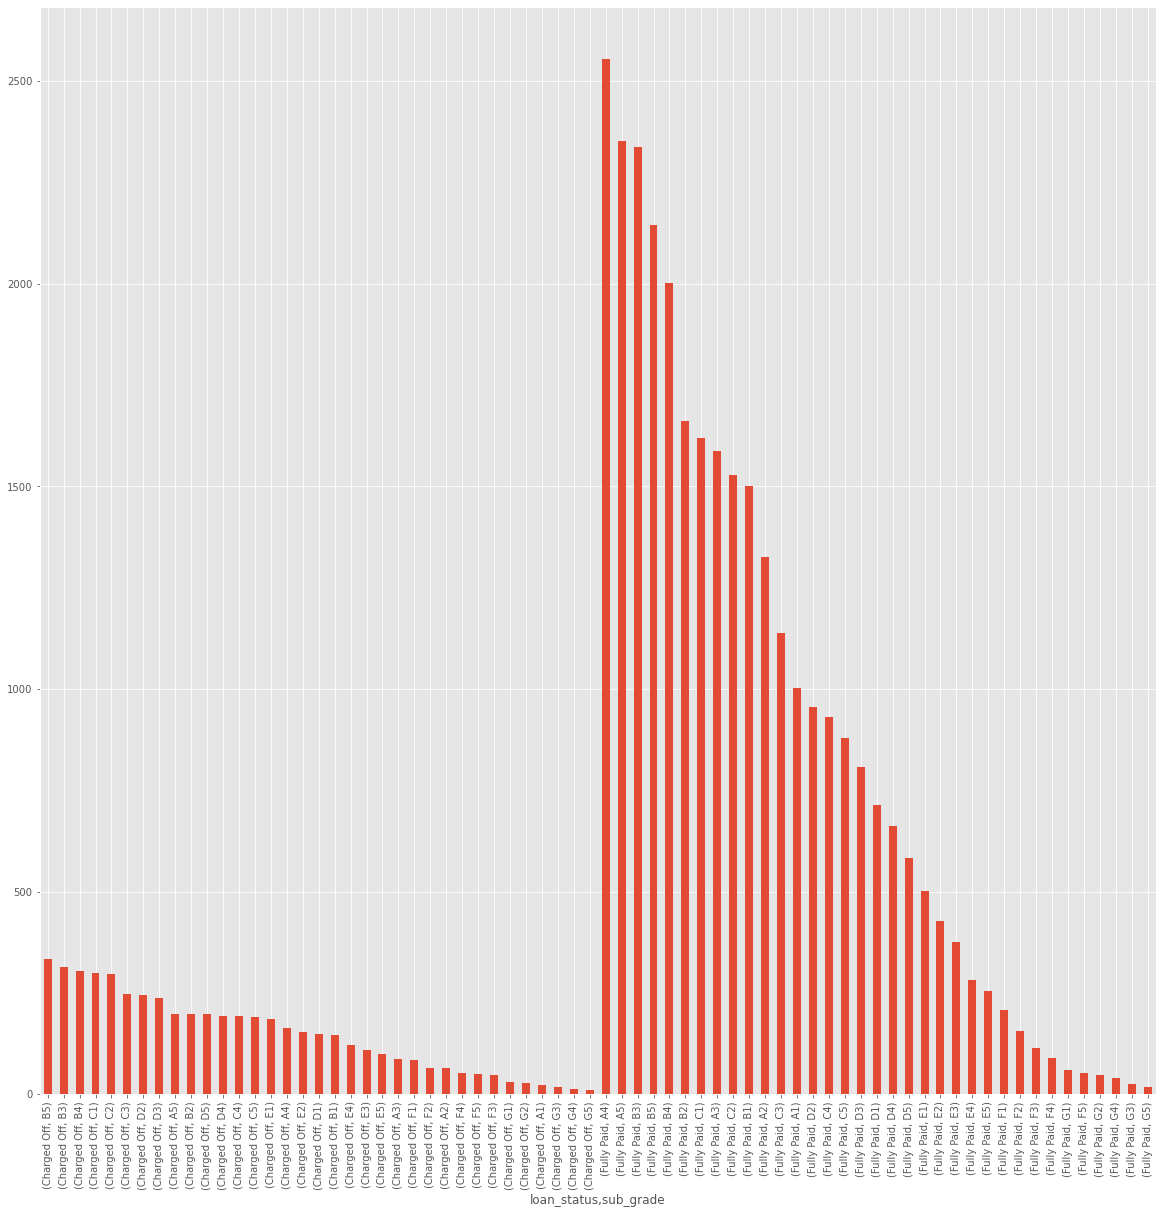

In [49]:
plt.figure(figsize=[20,20])
df.groupby(['loan_status'])['sub_grade'].value_counts().plot.bar()

In [50]:
sub_grade_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "sub_grade",
               values = "loan_amnt",
               aggfunc = np.median)

In [51]:
sub_grade_amnt.head()

sub_grade        A1      A2      A3      A4      A5      B1      B2       B3  \
loan_status                                                                    
Charged Off  7000.0  6500.0  8000.0  7000.0  8000.0  8000.0  8275.0  10000.0   
Fully Paid   6000.0  6500.0  7000.0  8250.0  9000.0  9000.0  9600.0  10000.0   

sub_grade         B4       B5  ...       F1       F2       F3       F4  \
loan_status                    ...                                       
Charged Off  10000.0  10000.0  ...  19412.5  18900.0  19000.0  20000.0   
Fully Paid   10000.0  10000.0  ...  15850.0  15000.0  16750.0  16000.0   

sub_grade         F5       G1       G2       G3       G4       G5  
loan_status                                                        
Charged Off  20000.0  16500.0  20000.0  20000.0  13500.0  18250.0  
Fully Paid   19400.0  20337.5  24000.0  21000.0  24000.0  20000.0  

[2 rows x 35 columns]

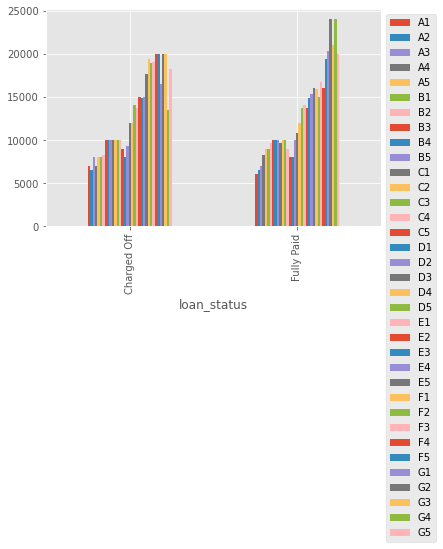

In [52]:
# plt.figure(figsize=[50,50])
sub_grade_amnt.plot.bar().legend(bbox_to_anchor=(1.0, 1.0))


In [53]:
df['emp_length'].value_counts()

10+ years    8226
< 1 year     4182
2 years      4088
3 years      3874
4 years      3235
5 years      3118
1 year       3004
6 years      2107
7 years      1666
8 years      1390
9 years      1198
Name: emp_length, dtype: int64

In [54]:
emplen = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

df = df.replace({'emp_length': emplen})

Value Count for home_ownership


RENT        17323
MORTGAGE    16062
OWN          2608
OTHER          95
Name: home_ownership, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and home_ownership


             count unique   top   freq
loan_status                           
Charged Off   5153      4  RENT   2586
Fully Paid   30935      4  RENT  14737
-----------------------------------------------------
Value Count for groupby series of loan_status and home_ownership


loan_status  home_ownership
Charged Off  RENT               2586
             MORTGAGE           2173
             OWN                 376
             OTHER                18
Fully Paid   RENT              14737
             MORTGAGE          13889
             OWN                2232
             OTHER                77
Name: home_ownership, dtype: int64
-----------------------------------------------------
Pivot table values with index as loan_status, column

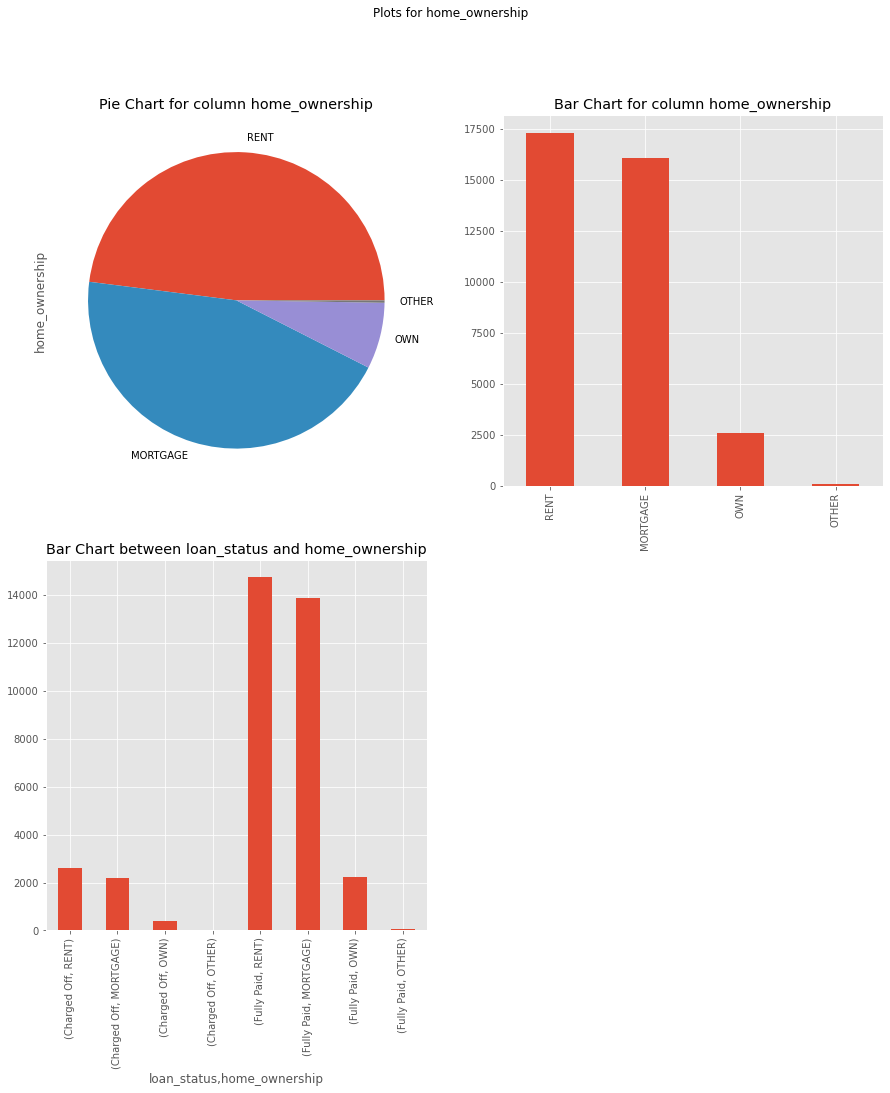

<Figure size 1080x1080 with 0 Axes>

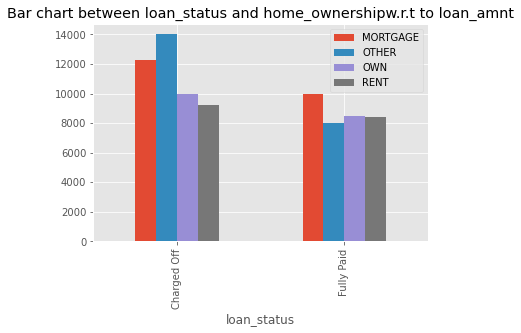

In [55]:
analyze_categorical(df,'home_ownership')

Value Count for verification_status


Not Verified       15302
Verified           11532
Source Verified     9254
Name: verification_status, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and verification_status


             count unique           top   freq
loan_status                                   
Charged Off   5153      3      Verified   1917
Fully Paid   30935      3  Not Verified  13431
-----------------------------------------------------
Value Count for groupby series of loan_status and verification_status


loan_status  verification_status
Charged Off  Verified                1917
             Not Verified            1871
             Source Verified         1365
Fully Paid   Not Verified           13431
             Verified                9615
             Source Verified         7889
Name: verification_status, dtype: int64
-----------------------------------------------------
Pivot table values with index a

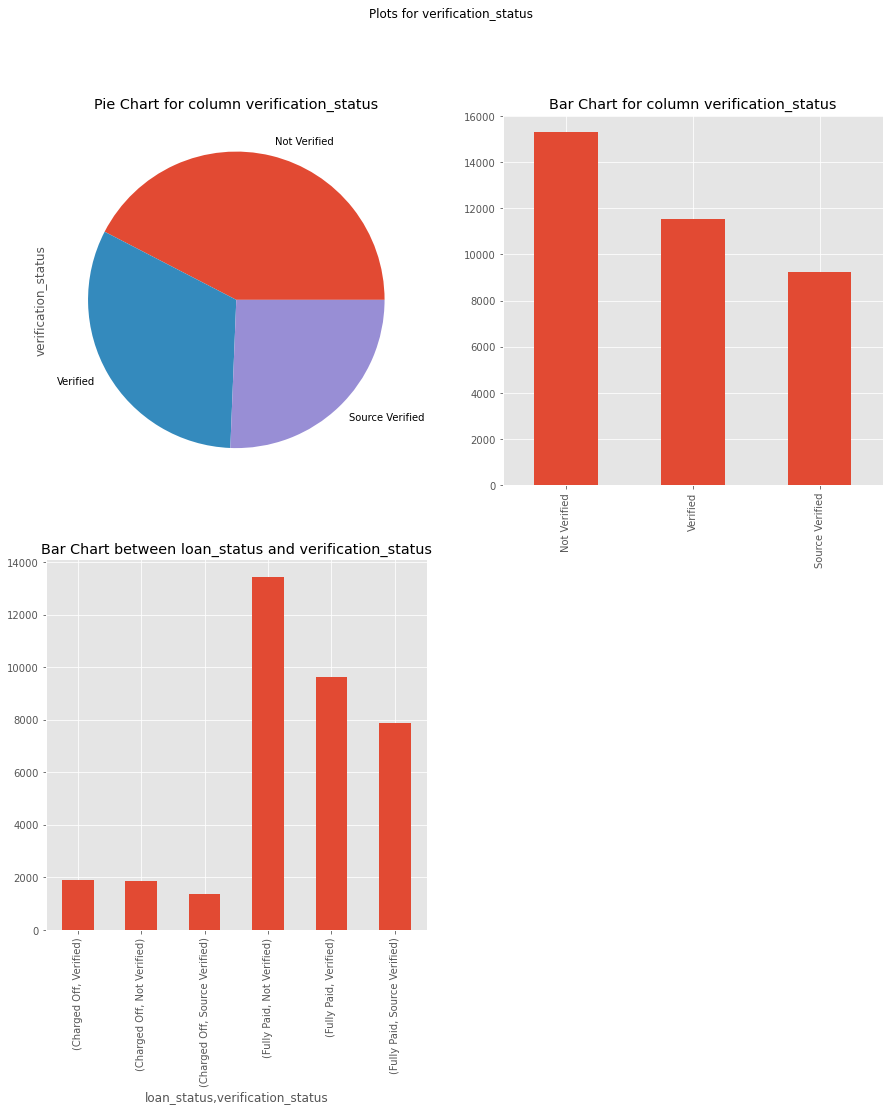

<Figure size 1080x1080 with 0 Axes>

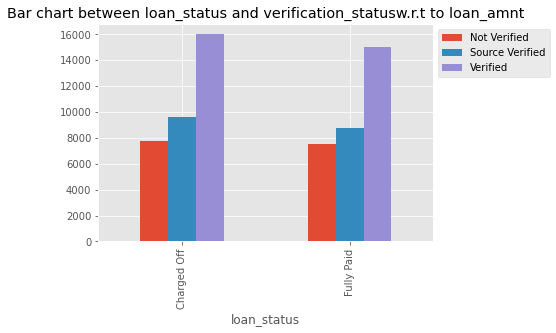

In [56]:
analyze_categorical(df,'verification_status')

Value Count for purpose


debt_consolidation    17114
credit_card            4734
other                  3504
home_improvement       2650
major_purchase         2011
small_business         1614
car                    1391
wedding                 884
medical                 632
moving                  519
house                   338
vacation                337
educational             269
renewable_energy         91
Name: purpose, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and purpose


             count unique                 top   freq
loan_status                                         
Charged Off   5153     14  debt_consolidation   2581
Fully Paid   30935     14  debt_consolidation  14533
-----------------------------------------------------
Value Count for groupby series of loan_status and purpose


loan_status  purpose           
Charged Off  debt_consolidation     2581
             other                   560
   

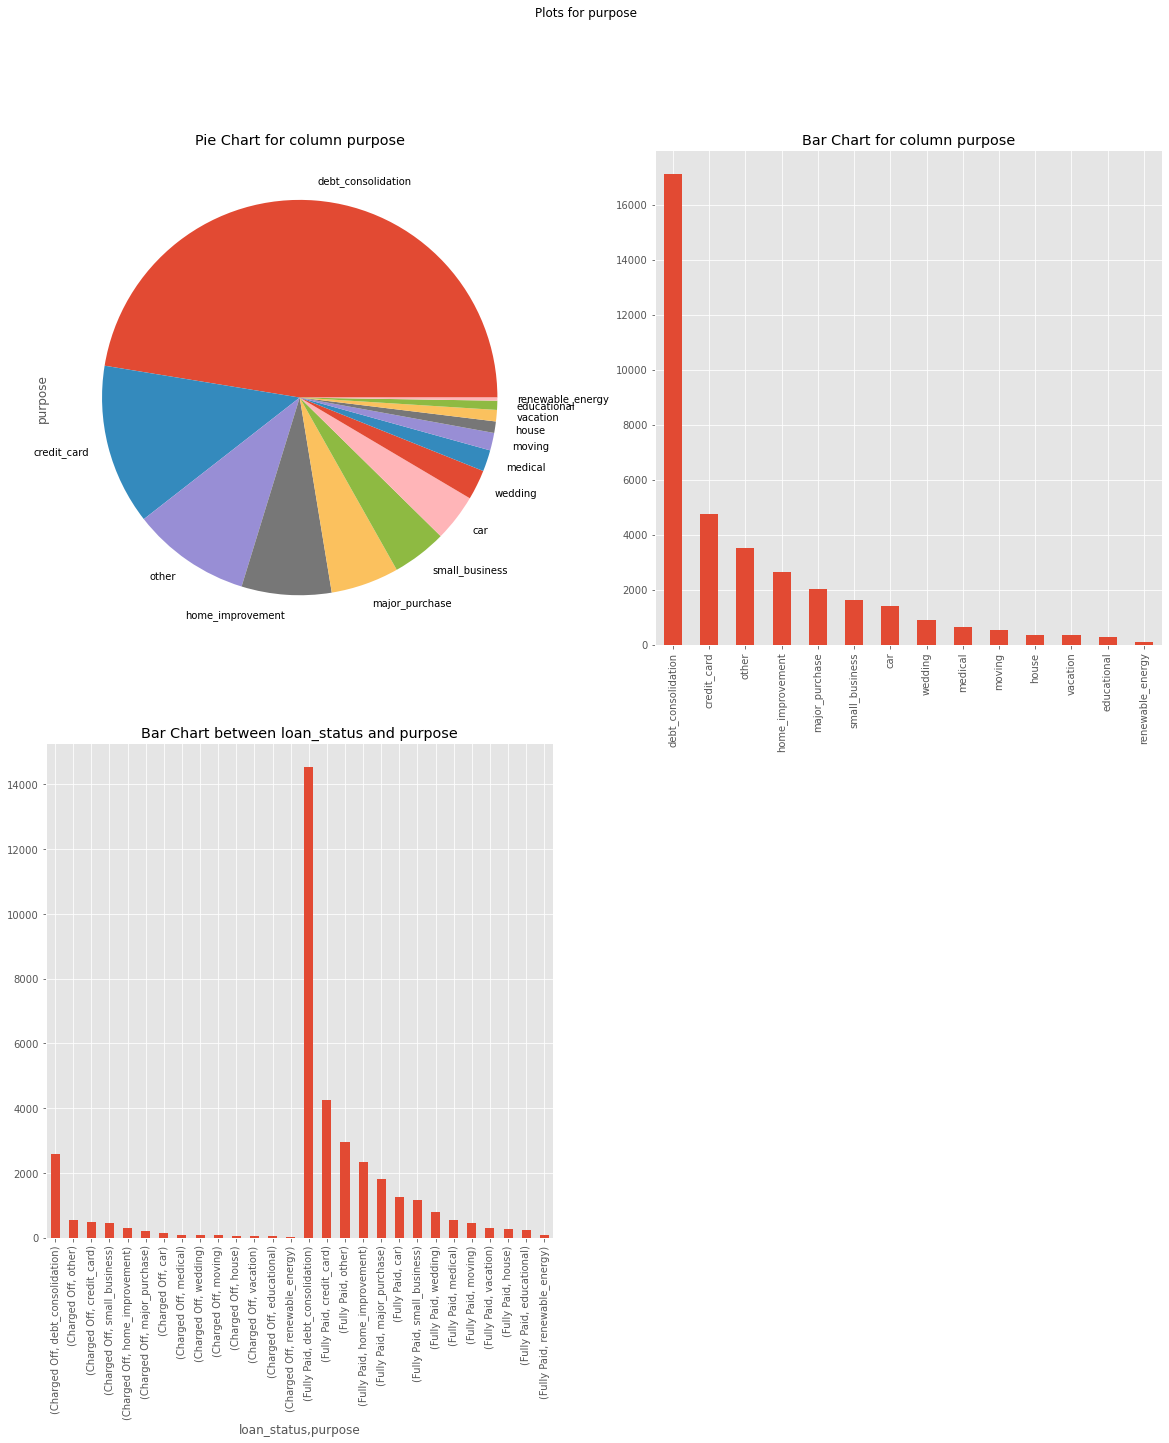

<Figure size 1440x1440 with 0 Axes>

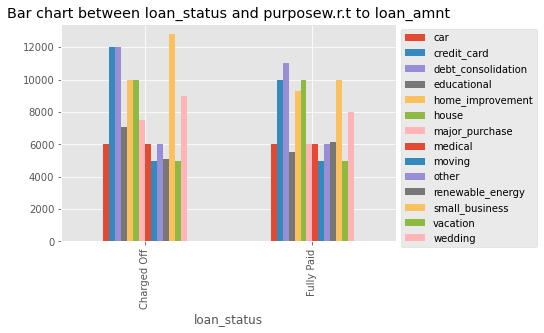

In [57]:
analyze_categorical(df,'purpose',20,20)

In [58]:
df['earliest_cr_line'].value_counts()

Oct-99    349
Nov-98    344
Oct-00    324
Dec-98    323
Nov-99    301
         ... 
Jun-69      1
Feb-66      1
Sep-64      1
Nov-54      1
May-72      1
Name: earliest_cr_line, Length: 513, dtype: int64

In [59]:
df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Feb-96', 'Nov-04', 'Jul-05', 'Jan-07',
       'Apr-04', 'Jan-98', 'Oct-89', 'May-91', 'Sep-07', 'Oct-98',
       'Aug-93', 'Oct-03', 'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85',
       'Apr-03', 'Jun-01', 'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87',
       'Nov-81', 'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Nov-01', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-88',
       'Feb-99', 'Dec-91', 'Aug-00', 'Oct-04', 'Aug-04', 'Feb-

In [60]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
df['ecl_month'] = df['earliest_cr_line'].dt.month
df['ecl_year'] = df['earliest_cr_line'].dt.year

In [61]:
df['ecl_month'].unique()

array([ 1,  4,  2, 11,  7, 10,  5,  9,  8,  6, 12,  3], dtype=int64)

In [62]:
df['ecl_year'].unique()

array([1985, 1999, 1996, 2004, 2005, 2007, 1998, 1989, 1991, 1993, 2003,
       2001, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1976, 1977, 1982, 2068, 1974, 2067, 1973, 2063, 2065,
       2066, 2062, 2056, 2046, 2050, 2064, 2054], dtype=int64)

In [63]:

len(df[df['ecl_year'] > 2009 ])

53

In [64]:
df['ecl_year'] = df['ecl_year'].apply(lambda x : (x-100) if x > 2009 else x)

In [65]:
len(df[df['ecl_year'] > 2009 ])

0

In [66]:
df['ecl_year'].unique()

array([1985, 1999, 1996, 2004, 2005, 2007, 1998, 1989, 1991, 1993, 2003,
       2001, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1976, 1977, 1982, 1968, 1974, 1967, 1973, 1963, 1965,
       1966, 1962, 1956, 1946, 1950, 1964, 1954], dtype=int64)

In [67]:
df['ecl_year'].value_counts()

2000    3007
1999    2782
1998    2646
2001    2356
1997    2272
1996    2086
1995    1955
1994    1825
2002    1788
2003    1721
2004    1633
2005    1377
1993    1361
2006    1056
1992     958
1990     927
1991     863
1989     769
1988     650
2007     622
1987     549
1986     438
1985     400
1984     349
1983     291
1982     188
1981     156
1980     153
1978     135
1979     133
2008     128
1977      95
1976      73
1975      65
1974      52
1973      44
1970      37
1971      37
1972      33
1969      25
1968      14
1967      14
1966       7
1965       5
1963       4
1962       3
1964       2
1956       1
1946       1
1950       1
1954       1
Name: ecl_year, dtype: int64

Value Count for ecl_month


10    3744
12    3689
11    3573
9     3261
1     3146
8     3002
7     2768
6     2675
5     2648
2     2593
3     2502
4     2487
Name: ecl_month, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and ecl_month


               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   5153.0  6.732389  3.583844  1.0  4.0  7.0  10.0  12.0
Fully Paid   30935.0  6.922127  3.533222  1.0  4.0  7.0  10.0  12.0
-----------------------------------------------------
Value Count for groupby series of loan_status and ecl_month


loan_status  ecl_month
Charged Off  12            550
             1             494
             10            486
             11            458
             9             448
             8             417
             4             402
             6             397
             2             393
       

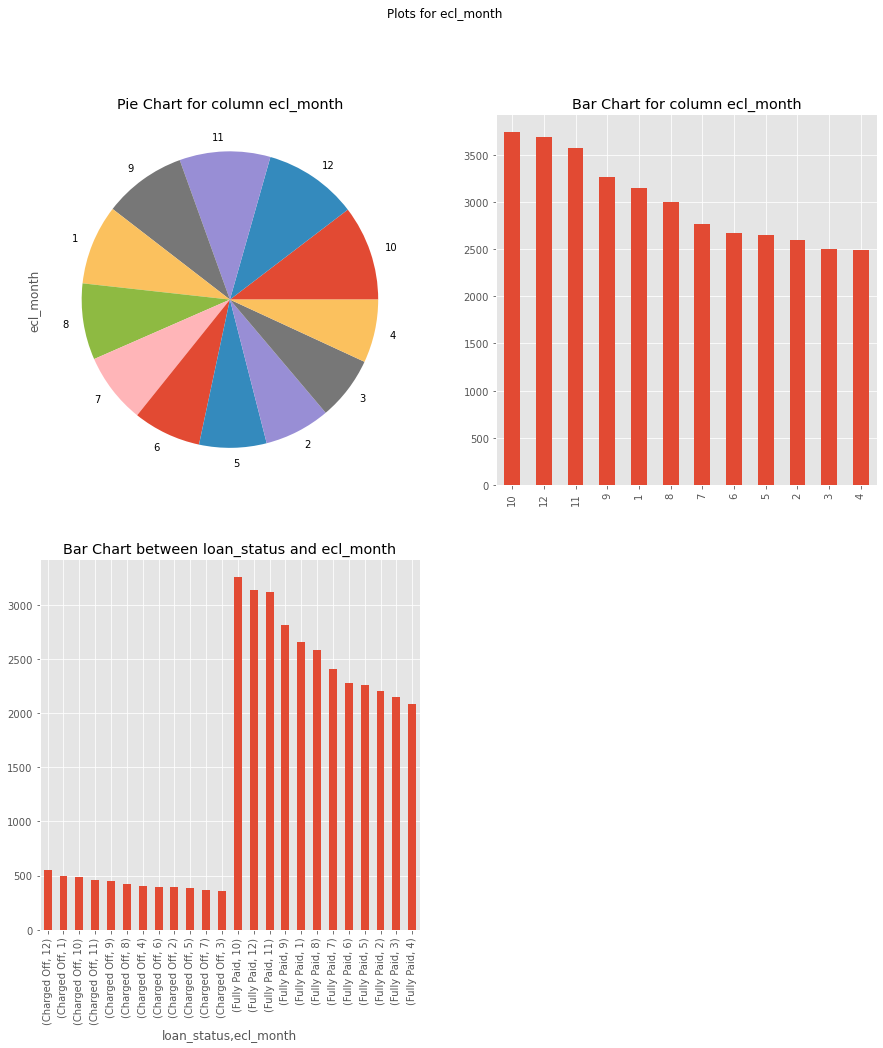

<Figure size 1080x1080 with 0 Axes>

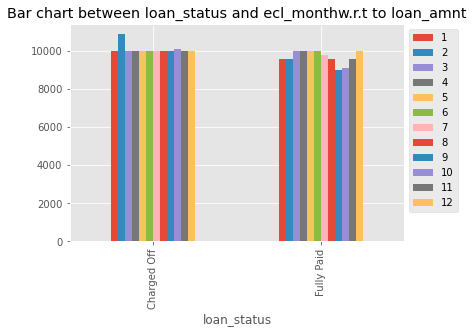

In [68]:
analyze_categorical(df,'ecl_month')

Value Count for pub_rec_bankruptcies


0.0    34564
1.0     1519
2.0        5
Name: pub_rec_bankruptcies, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and pub_rec_bankruptcies


               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5153.0  0.065399  0.248817  0.0  0.0  0.0  0.0  2.0
Fully Paid   30935.0  0.038532  0.192984  0.0  0.0  0.0  0.0  2.0
-----------------------------------------------------
Value Count for groupby series of loan_status and pub_rec_bankruptcies


loan_status  pub_rec_bankruptcies
Charged Off  0.0                      4818
             1.0                       333
             2.0                         2
Fully Paid   0.0                     29746
             1.0                      1186
             2.0                         3
Name: pub_rec_bankruptcies, dtype: int64
---------------------------------

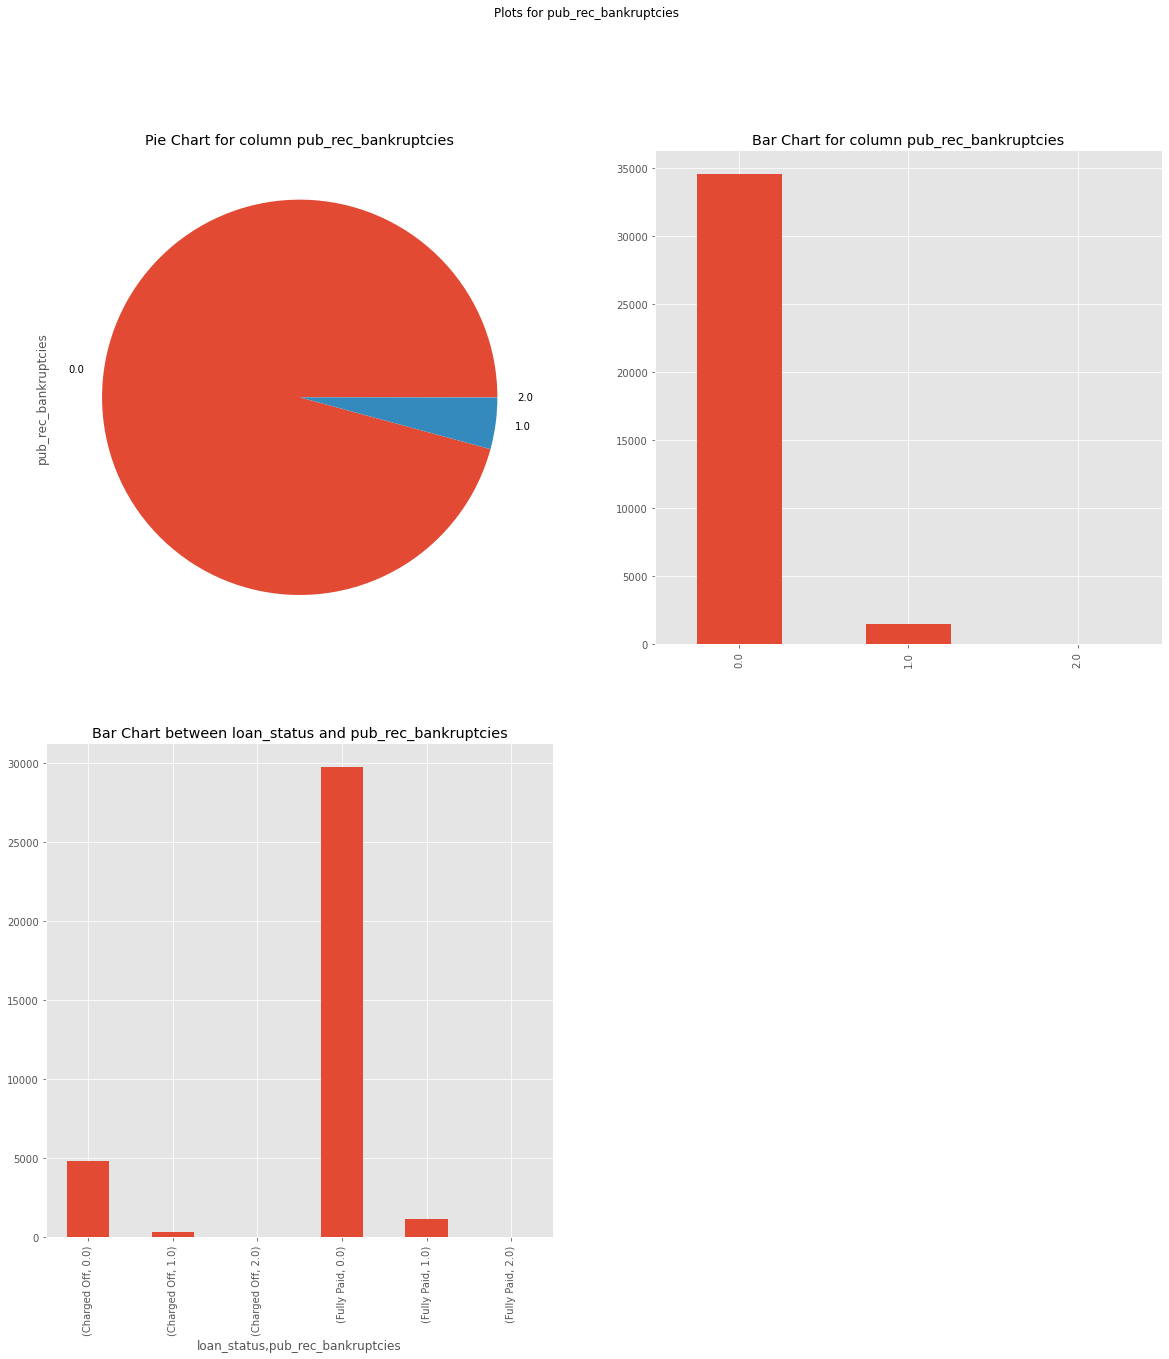

<Figure size 1440x1440 with 0 Axes>

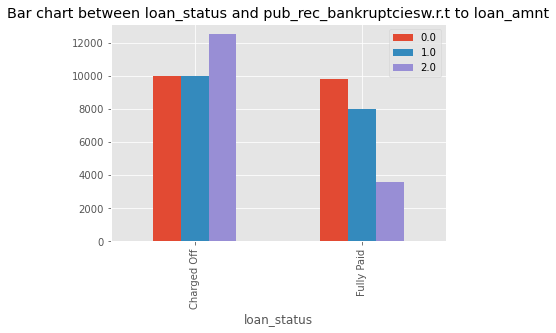

In [69]:
analyze_categorical(df,'pub_rec_bankruptcies',plotsize_x= 20,plotsize_y=20)

Value Count for pub_rec


0    34174
1     1861
2       44
3        7
4        2
Name: pub_rec, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and pub_rec


               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5153.0  0.084223  0.284651  0.0  0.0  0.0  0.0  2.0
Fully Paid   30935.0  0.049911  0.227494  0.0  0.0  0.0  0.0  4.0
-----------------------------------------------------
Value Count for groupby series of loan_status and pub_rec


loan_status  pub_rec
Charged Off  0           4729
             1            414
             2             10
Fully Paid   0          29445
             1           1447
             2             34
             3              7
             4              2
Name: pub_rec, dtype: int64
-----------------------------------------------------
Pivot table values with index as loan_status, column as pub

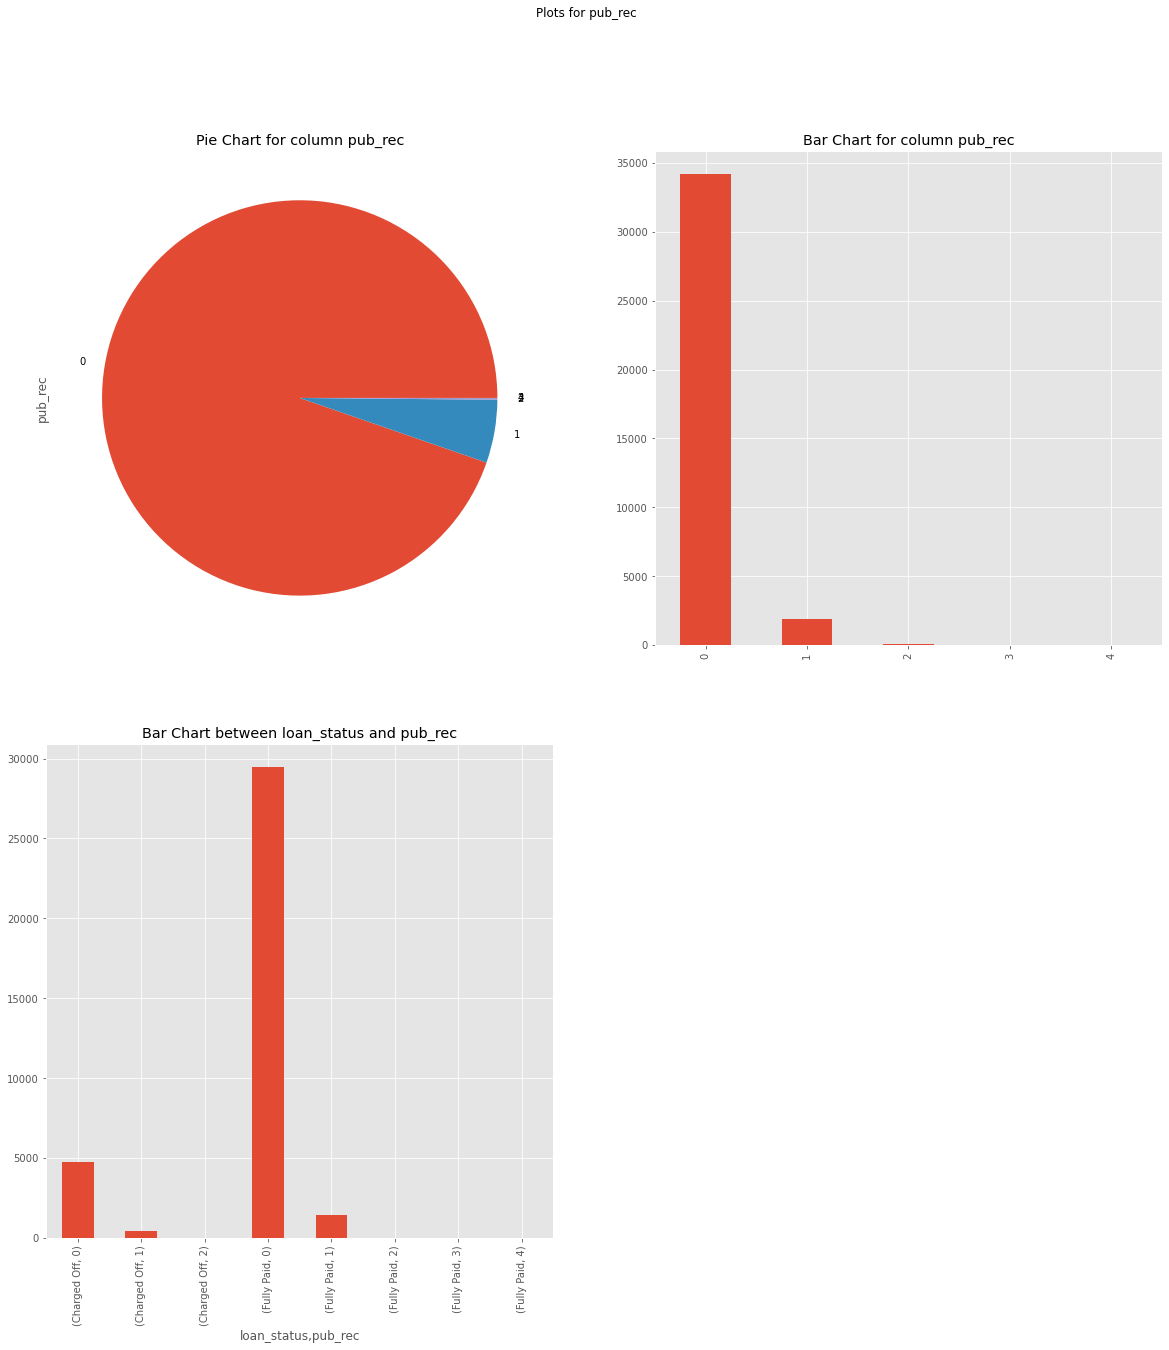

<Figure size 1440x1440 with 0 Axes>

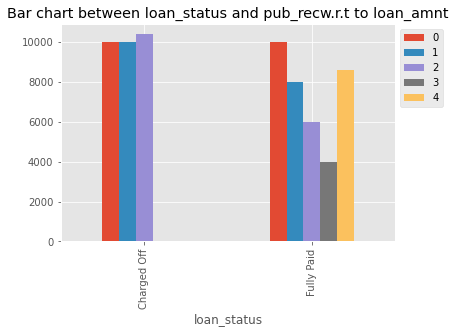

In [70]:
analyze_categorical(df,'pub_rec',20,20)

Value Count for loan_amnt


10000    2650
12000    2161
5000     1890
6000     1790
15000    1752
         ... 
22125       1
21100       1
29375       1
32875       1
700         1
Name: loan_amnt, Length: 852, dtype: int64
-----------------------------------------------------
Describe for loan_amnt


count    36088.000000
mean     11137.126607
std       7278.032258
min        500.000000
25%       5575.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and loan_amnt


               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   5153.0  12320.206676  8041.394165  1000.0  6000.0  10000.0   
Fully Paid   30935.0  10940.054954  7124.030463   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Cha

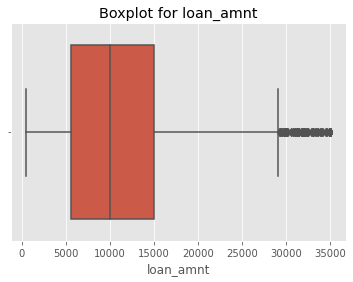

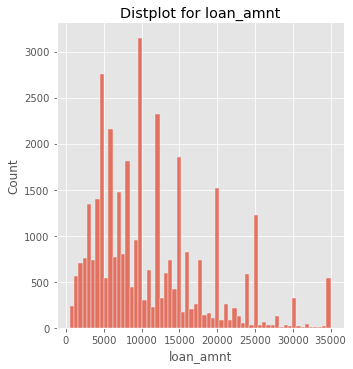

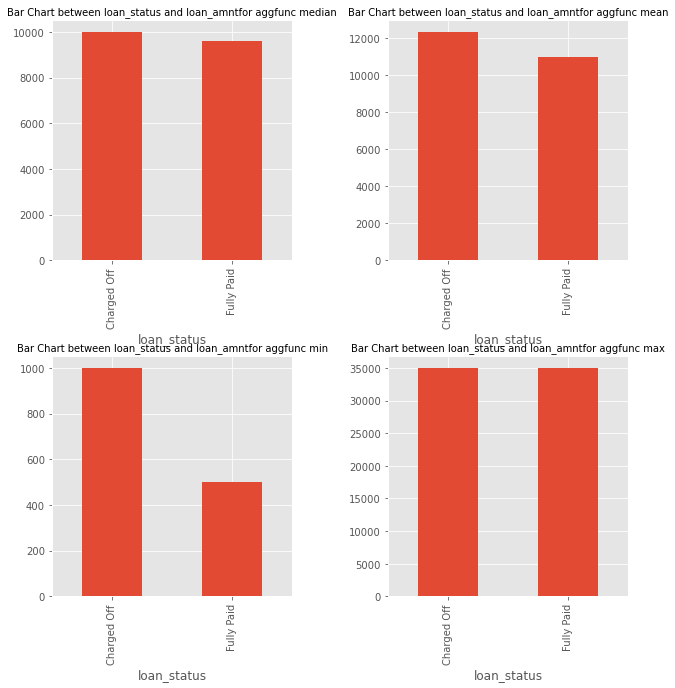

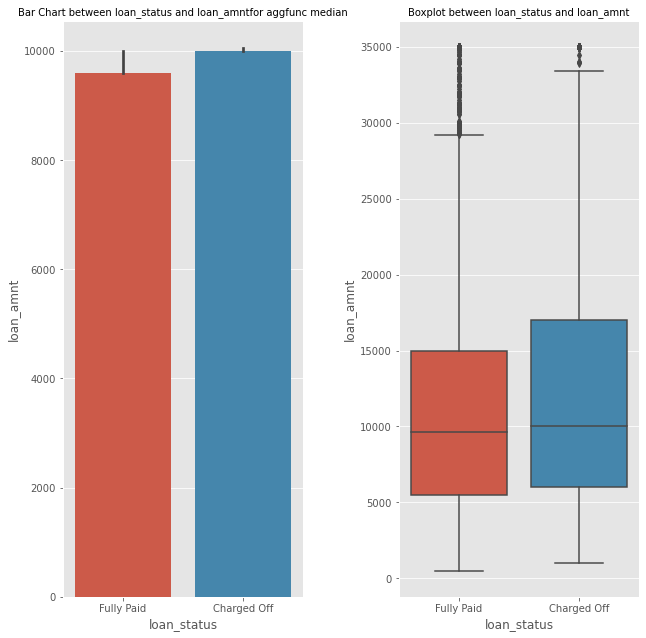

-----------------------------------------------------
Pivot table values with index as loan_status, column as loan_amnt and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VL      2 non-null      int64
 1   L       2 non-null      int64
 2   M       2 non-null      int64
 3   H       2 non-null      int64
 4   VH      2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes
None
loan_amnt_bucket           VL           L        M        H            VH
count                2.000000     2.00000      2.0      2.0      2.000000
mean              3712.500000  6987.50000  10000.0  14000.0  21925.000000
std                123.743687    17.67767      0.0      0.0    954.594155
min               3625.000000  6975.00000  10000.0  14000.0  21250.000000
25%               3668.750000  6981.25000  10000.0  14

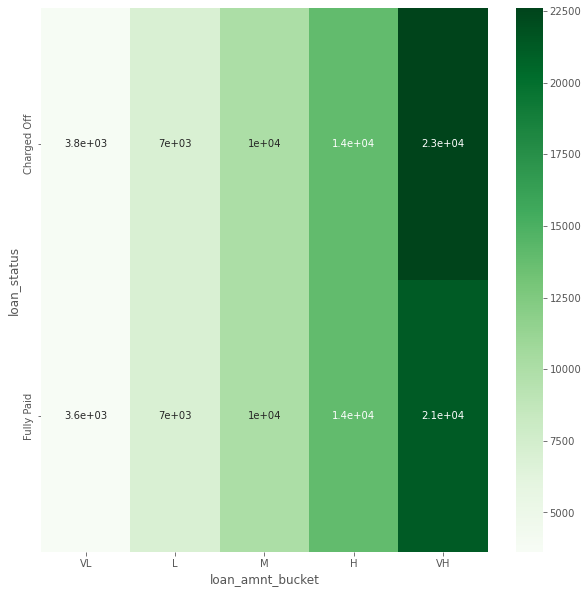

<Figure size 720x720 with 0 Axes>

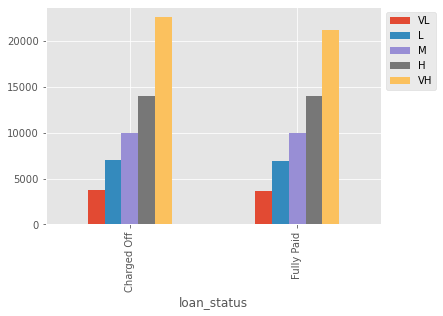

In [71]:
analyze_numerical(df,'loan_amnt')

In [72]:

df['int_rate'] = df['int_rate'].str.strip('%').astype('float')

Value Count for int_rate


10.99    874
11.49    754
7.51     748
13.49    729
7.88     683
        ... 
16.96      1
17.46      1
16.20      1
18.72      1
11.22      1
Name: int_rate, Length: 335, dtype: int64
-----------------------------------------------------
Describe for int_rate


count    36088.000000
mean        11.974472
std          3.699224
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and int_rate


               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5153.0  13.937858  3.653053  5.42  11.49  13.79  16.45  24.40
Fully Paid   30935.0  11.647421  3.604459  5.42   8.59  11.49  13.99  24.11
-----------------------------------------------------


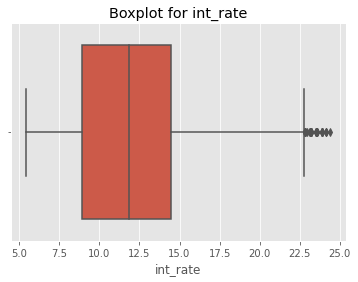

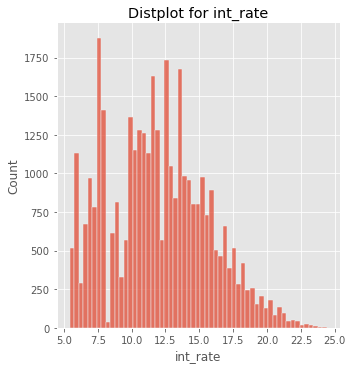

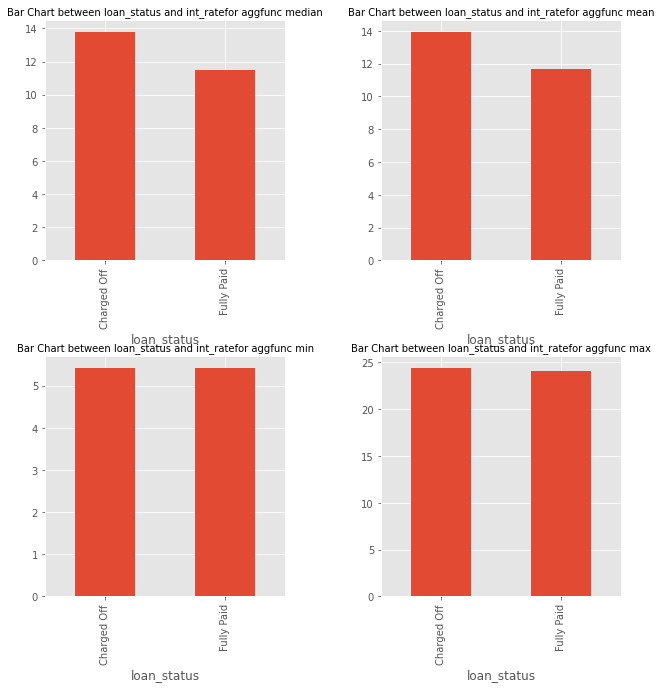

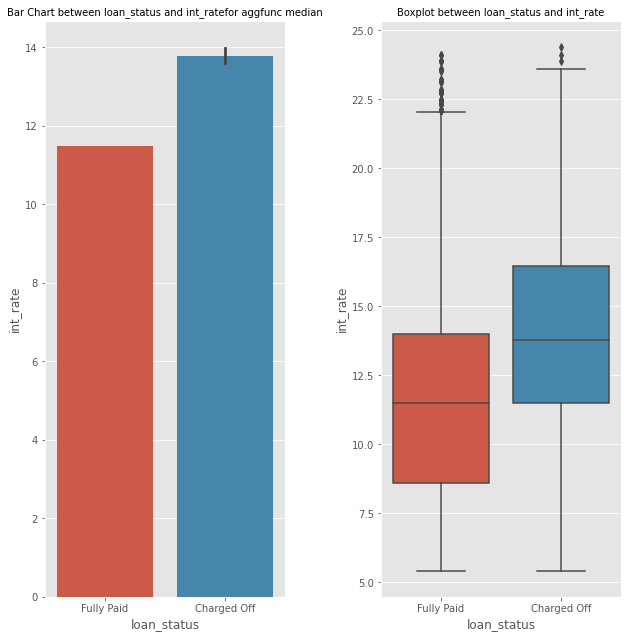

-----------------------------------------------------
Pivot table values with index as loan_status, column as int_rate and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VL      2 non-null      float64
 1   L       2 non-null      float64
 2   M       2 non-null      float64
 3   H       2 non-null      float64
 4   VH      2 non-null      float64
dtypes: float64(5)
memory usage: 96.0+ bytes
None
int_rate_bucket        VL          L          M          H        VH
count            2.000000   2.000000   2.000000   2.000000   2.00000
mean             7.315000  10.180000  11.875000  13.915000  17.10000
std              0.247487   0.254558   0.021213   0.091924   0.46669
min              7.140000  10.000000  11.860000  13.850000  16.77000
25%              7.227500  10.090000  11.867500  13.882500  16.9

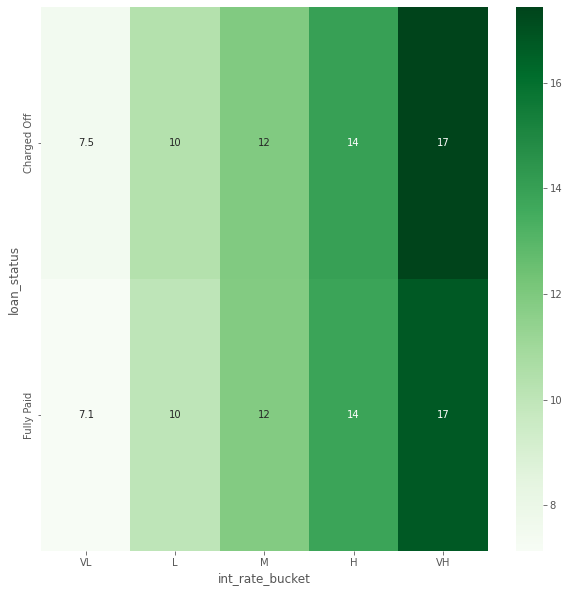

<Figure size 720x720 with 0 Axes>

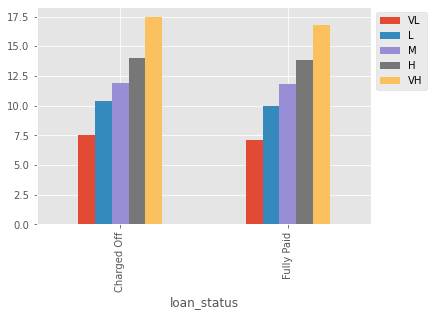

In [73]:
analyze_numerical(df,'int_rate')

Value Count for installment


311.11    68
180.96    53
311.02    53
150.80    46
368.45    45
          ..
314.61     1
335.80     1
248.49     1
370.96     1
99.44      1
Name: installment, Length: 14183, dtype: int64
-----------------------------------------------------
Describe for installment


count    36088.000000
mean       324.392125
std        205.902711
min         16.080000
25%        169.010000
50%        280.970000
75%        427.100000
max       1305.190000
Name: installment, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and installment


               count        mean         std    min     25%     50%     75%  \
loan_status                                                                   
Charged Off   5153.0  340.170670  213.943664  24.32  174.08  298.49  460.10   
Fully Paid   30935.0  321.763813  204.417846  16.08  168.42  278.48  422.24   

                 max  
loan_status           
Charged 

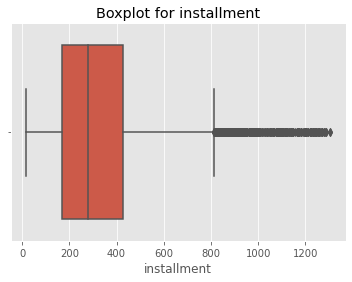

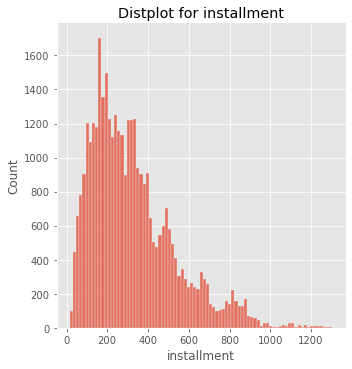

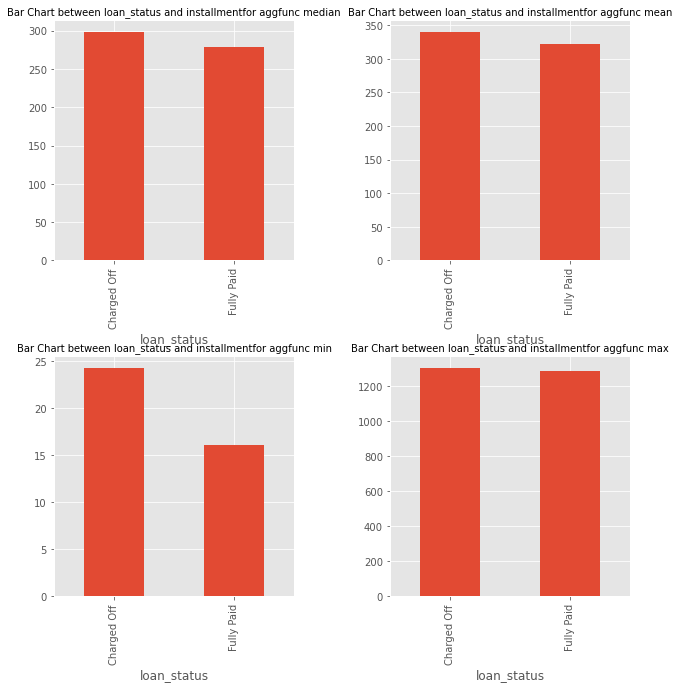

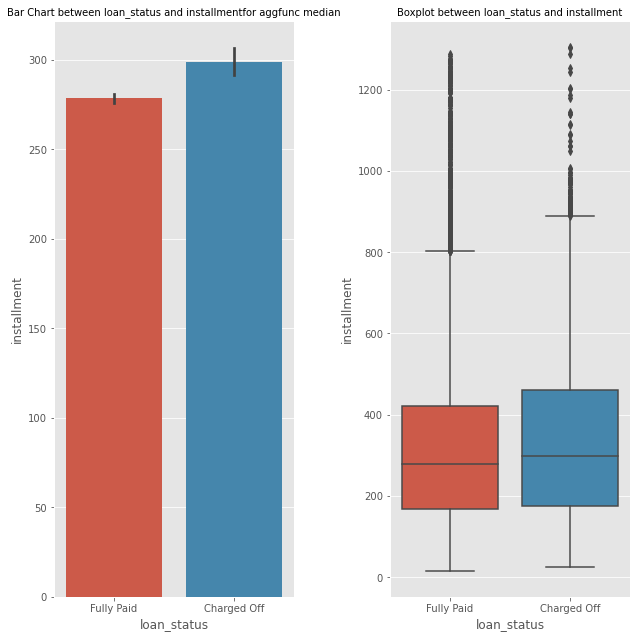

-----------------------------------------------------
Pivot table values with index as loan_status, column as installment and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VL      2 non-null      float64
 1   L       2 non-null      float64
 2   M       2 non-null      float64
 3   H       2 non-null      float64
 4   VH      2 non-null      float64
dtypes: float64(5)
memory usage: 96.0+ bytes
None
installment_bucket          VL           L          M           H          VH
count                 2.000000    2.000000    2.00000    2.000000    2.000000
mean                101.590000  189.725000  281.08000  389.040000  617.675000
std                   1.032376    0.586899    0.19799    0.367696    0.784889
min                 100.860000  189.310000  280.94000  388.780000  617.120000
25%             

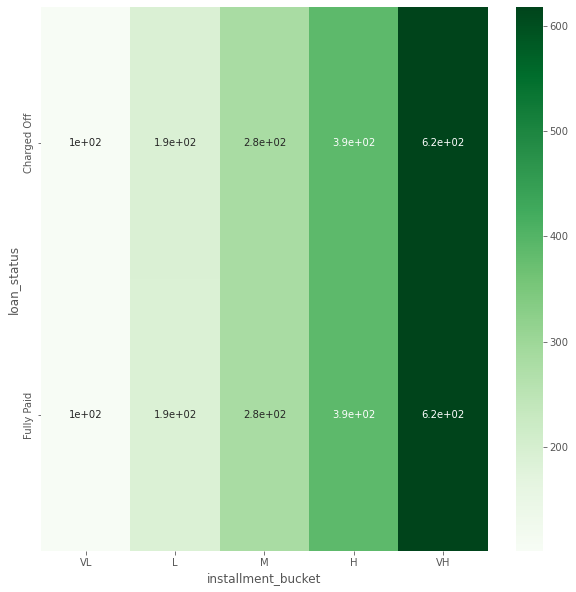

<Figure size 720x720 with 0 Axes>

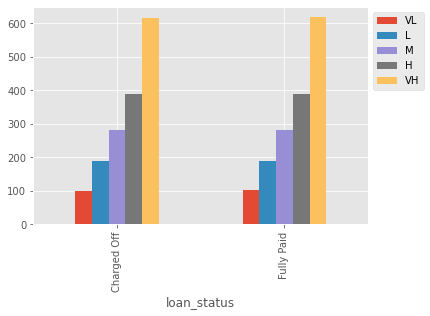

In [74]:
analyze_numerical(df,'installment')

Value Count for emp_length


10    8226
0     4182
2     4088
3     3874
4     3235
5     3118
1     3004
6     2107
7     1666
8     1390
9     1198
Name: emp_length, dtype: int64
-----------------------------------------------------
Describe for emp_length


count    36088.000000
mean         4.982210
std          3.547807
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and emp_length


               count      mean       std  min  25%  50%  75%   max
loan_status                                                       
Charged Off   5153.0  5.145158  3.589944  0.0  2.0  5.0  9.0  10.0
Fully Paid   30935.0  4.955067  3.540069  0.0  2.0  4.0  9.0  10.0
-----------------------------------------------------


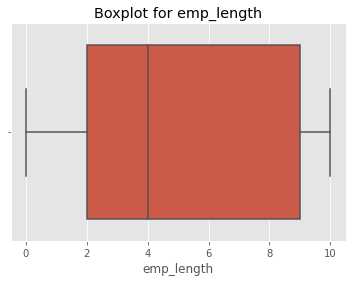

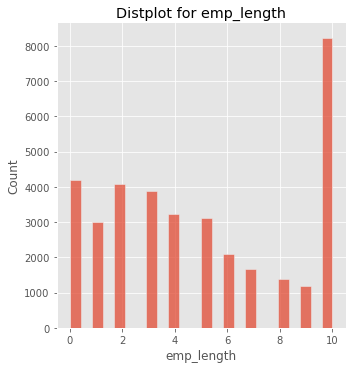

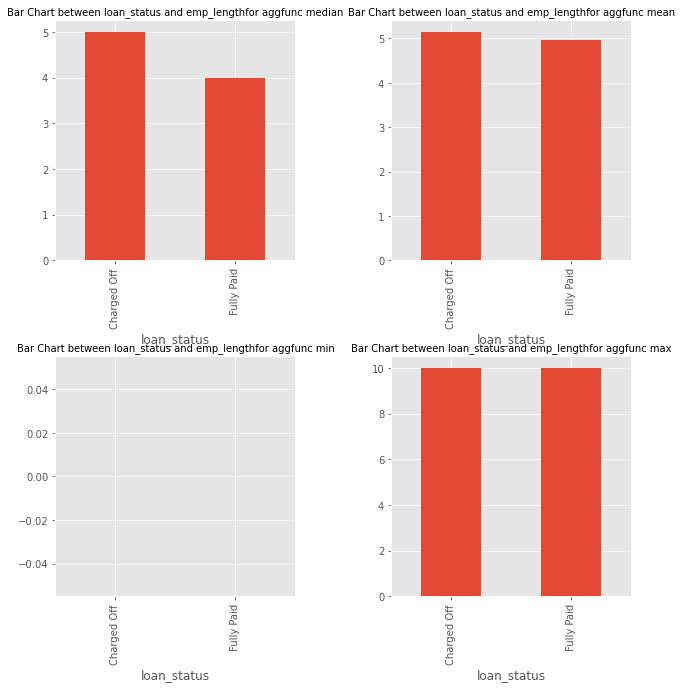

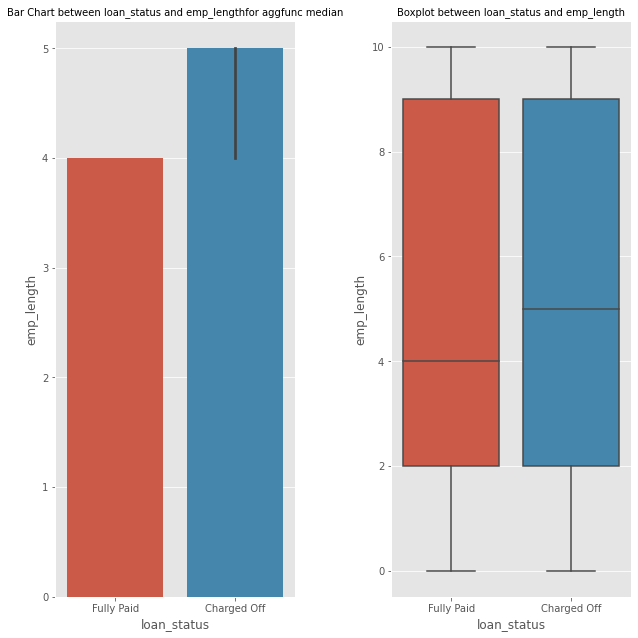

In [75]:
analyze_numerical(df,'emp_length',heatmap=False)

In [76]:
df['annual_inc'].describe()

count     36088.000000
mean      66540.122102
std       34852.161231
min       15085.000000
25%       42000.000000
50%       60000.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [77]:
q_low = df['annual_inc'].quantile(0.01)
q_hi = df['annual_inc'].quantile(0.99)

df = df[(df["annual_inc"] < q_hi) & (df["annual_inc"] > q_low)]

Value Count for annual_inc


60000.0    1409
50000.0     996
40000.0     824
45000.0     776
75000.0     761
           ... 
34224.0       1
53140.0       1
34884.0       1
80569.0       1
36153.0       1
Name: annual_inc, Length: 4580, dtype: int64
-----------------------------------------------------
Describe for annual_inc


count     35285.000000
mean      65708.293852
std       31759.050982
min       19240.000000
25%       42000.000000
50%       60000.000000
75%       81000.000000
max      189000.000000
Name: annual_inc, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and annual_inc


               count          mean           std      min      25%      50%  \
loan_status                                                                   
Charged Off   5035.0  61226.977732  30161.577682  19800.0  40000.0  54996.0   
Fully Paid   30250.0  66454.192255  31956.738415  19240.0  42408.0  60000.0   

                 75

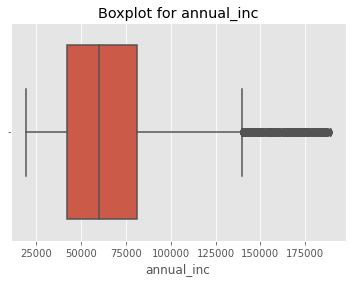

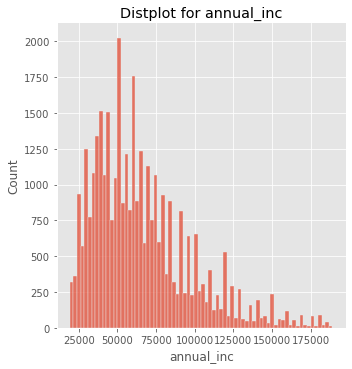

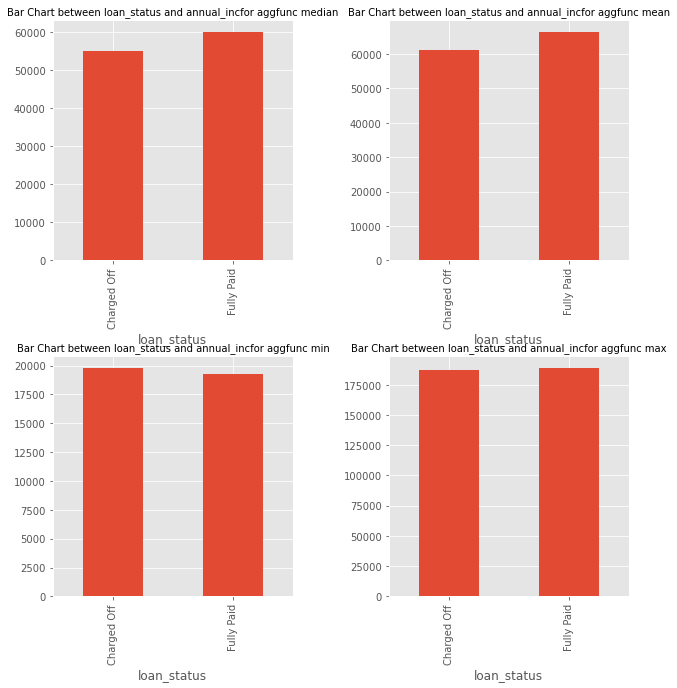

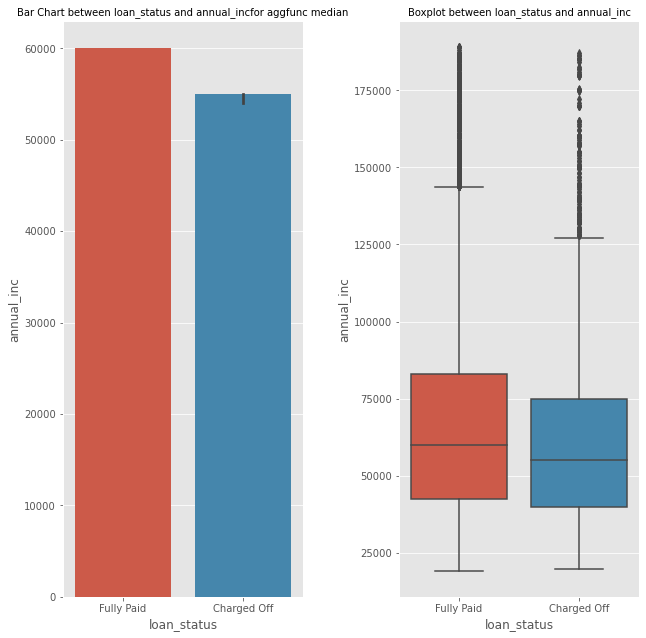

-----------------------------------------------------
Pivot table values with index as loan_status, column as annual_inc and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VL      2 non-null      float64
 1   L       2 non-null      float64
 2   M       2 non-null      float64
 3   H       2 non-null      float64
 4   VH      2 non-null      float64
dtypes: float64(5)
memory usage: 96.0+ bytes
None
annual_inc_bucket       VL        L        M             H             VH
count                  2.0      2.0      2.0      2.000000       2.000000
mean               31200.0  45000.0  60000.0  76250.000000  113626.500000
std                    0.0      0.0      0.0    353.553391    1656.751188
min                31200.0  45000.0  60000.0  76000.000000  112455.000000
25%                31200.0  45000.0  

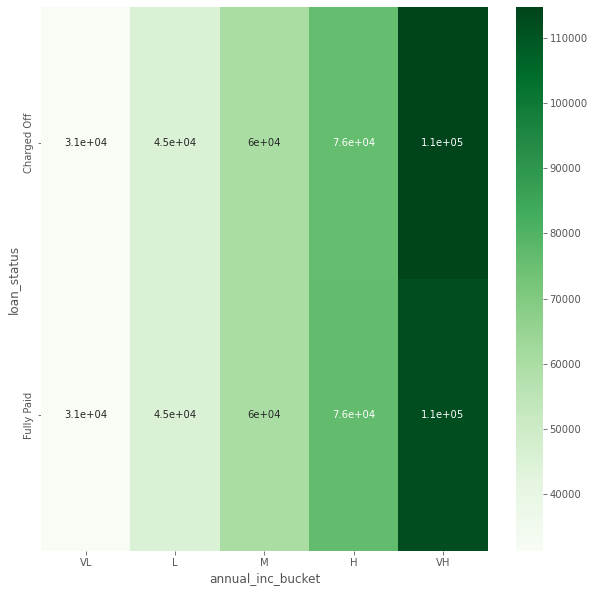

<Figure size 720x720 with 0 Axes>

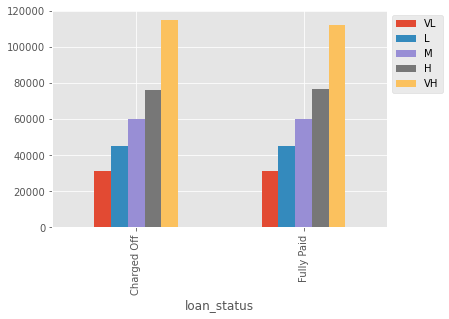

In [78]:
analyze_numerical(df,'annual_inc')

Value Count for ecl_month


10    3660
12    3608
11    3502
9     3184
1     3086
8     2924
7     2697
6     2608
5     2594
2     2543
4     2441
3     2438
Name: ecl_month, dtype: int64
-----------------------------------------------------
Describe for ecl_month


count    35285.000000
mean         6.892816
std          3.543576
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: ecl_month, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and ecl_month


               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   5035.0  6.730288  3.588866  1.0  4.0  7.0  10.0  12.0
Fully Paid   30250.0  6.919868  3.535315  1.0  4.0  7.0  10.0  12.0
-----------------------------------------------------


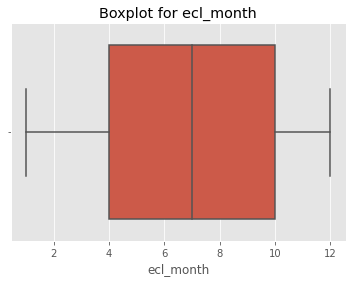

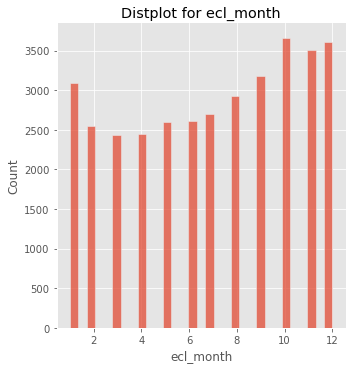

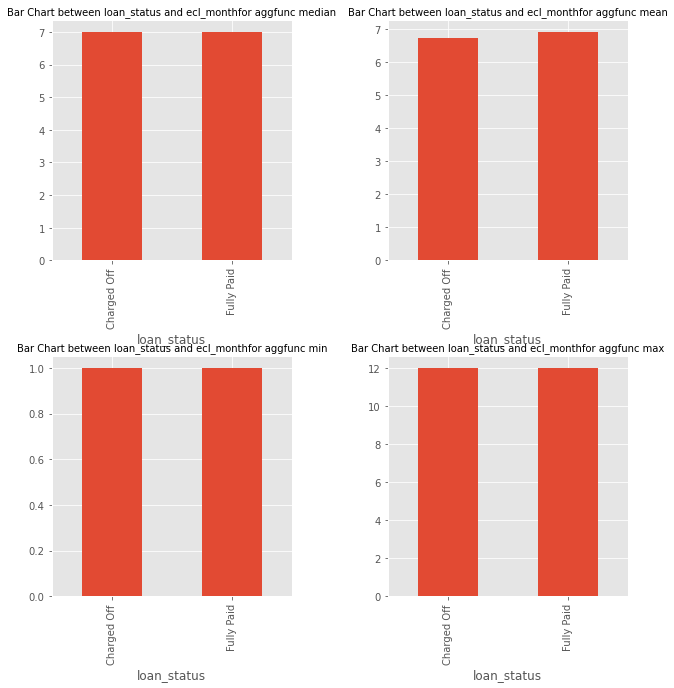

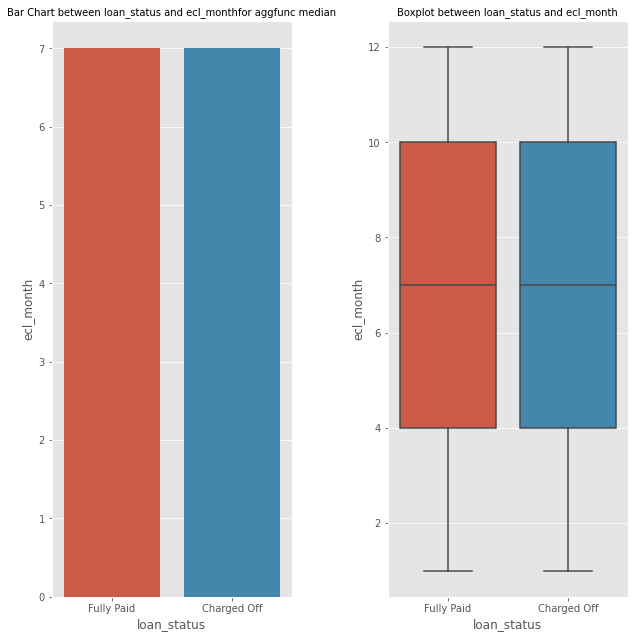

-----------------------------------------------------
Pivot table values with index as loan_status, column as ecl_month and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VL      2 non-null      int64
 1   L       2 non-null      int64
 2   M       2 non-null      int64
 3   H       2 non-null      int64
 4   VH      2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes
None
ecl_month_bucket   VL    L    M     H    VH
count             2.0  2.0  2.0   2.0   2.0
mean              2.0  5.0  8.0  10.0  12.0
std               0.0  0.0  0.0   0.0   0.0
min               2.0  5.0  8.0  10.0  12.0
25%               2.0  5.0  8.0  10.0  12.0
50%               2.0  5.0  8.0  10.0  12.0
75%               2.0  5.0  8.0  10.0  12.0
max               2.0  5.0  8.0  10.0  12.0
ecl_month_bucket  VL  L  M  

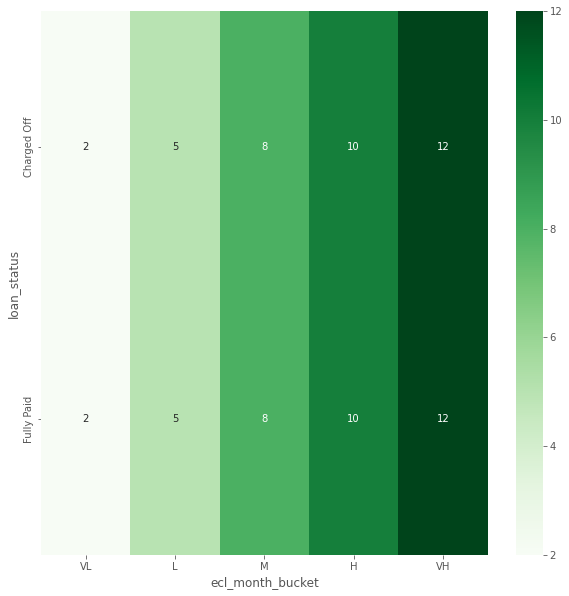

<Figure size 720x720 with 0 Axes>

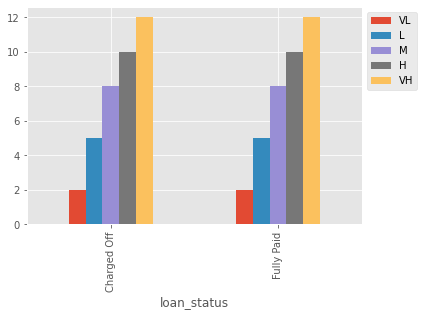

In [79]:
analyze_numerical(df,'ecl_month')

Value Count for ecl_year


2000    2962
1999    2743
1998    2606
2001    2329
1997    2236
1996    2051
1995    1927
1994    1788
2002    1750
2003    1694
2004    1578
1993    1334
2005    1323
2006     985
1992     944
1990     906
1991     836
1989     743
1988     638
2007     590
1987     529
1986     434
1985     382
1984     337
1983     285
1982     183
1980     151
1981     151
1978     129
1979     127
2008     116
1977      93
1976      69
1975      64
1974      49
1973      44
1970      37
1971      35
1972      30
1969      24
1968      14
1967      14
1966       7
1965       5
1963       4
1962       3
1964       2
1956       1
1946       1
1950       1
1954       1
Name: ecl_year, dtype: int64
-----------------------------------------------------
Describe for ecl_year


count    35285.000000
mean      1996.747853
std          6.556655
min       1946.000000
25%       1994.000000
50%       1998.000000
75%       2001.000000
max       2008.000000
Name: ecl_year, dtype: floa

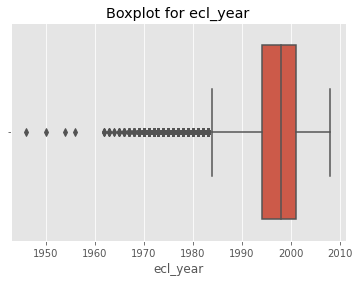

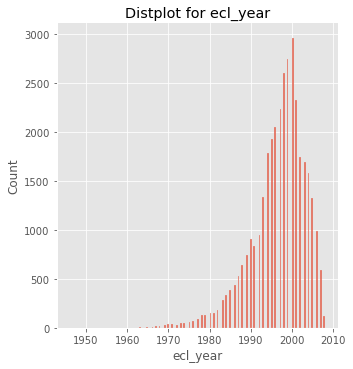

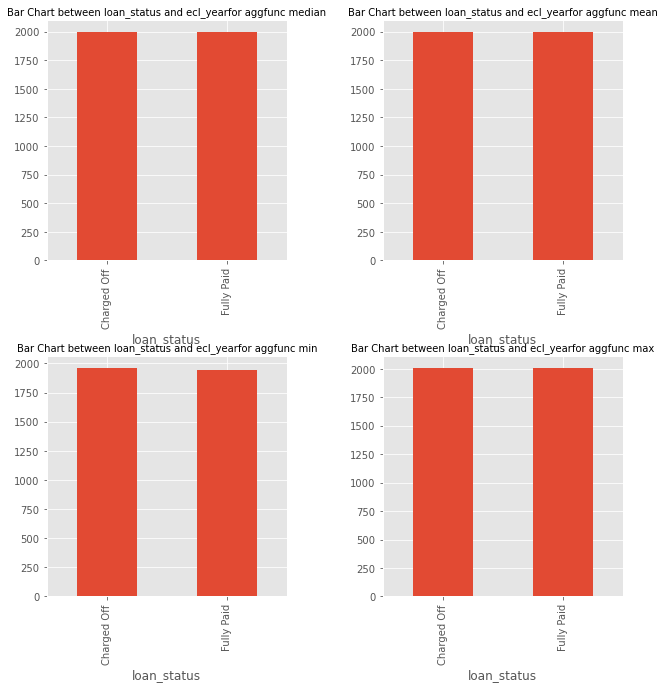

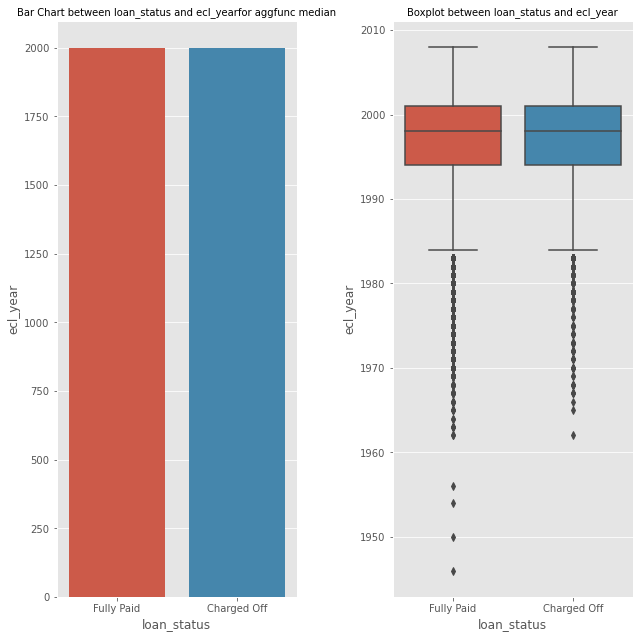

-----------------------------------------------------
Pivot table values with index as loan_status, column as ecl_year and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VL      2 non-null      int64
 1   L       2 non-null      int64
 2   M       2 non-null      int64
 3   H       2 non-null      int64
 4   VH      2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes
None
ecl_year_bucket      VL       L       M       H           VH
count               2.0     2.0     2.0     2.0     2.000000
mean             1988.0  1995.0  1998.0  2001.0  2004.500000
std                 0.0     0.0     0.0     0.0     0.707107
min              1988.0  1995.0  1998.0  2001.0  2004.000000
25%              1988.0  1995.0  1998.0  2001.0  2004.250000
50%              1988.0  1995.0  1998.0  2001.0  2004.50000

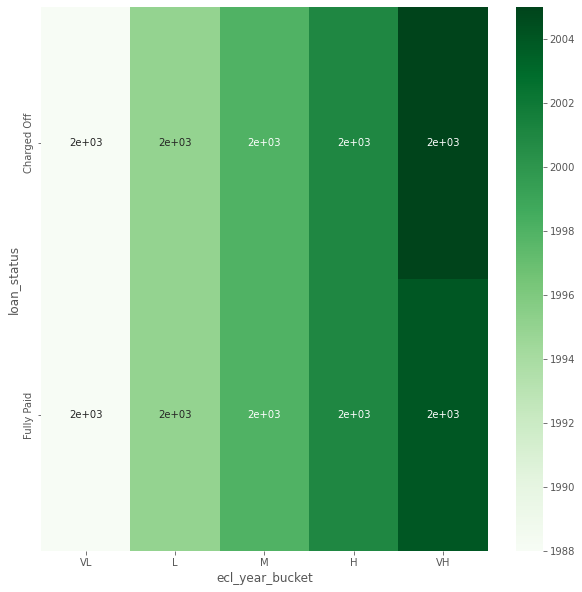

<Figure size 720x720 with 0 Axes>

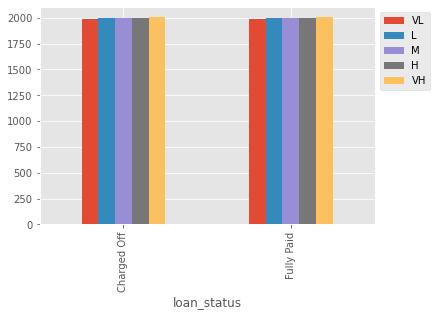

In [80]:
analyze_numerical(df,'ecl_year')

Value Count for dti


0.00     121
18.00     38
13.20     38
19.20     37
12.00     37
        ... 
27.29      1
27.69      1
26.61      1
25.01      1
25.43      1
Name: dti, Length: 2845, dtype: int64
-----------------------------------------------------
Describe for dti


count    35285.000000
mean        13.470603
std          6.620927
min          0.000000
25%          8.400000
50%         13.580000
75%         18.690000
max         29.990000
Name: dti, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and dti


               count       mean       std  min   25%     50%    75%    max
loan_status                                                               
Charged Off   5035.0  14.169809  6.526500  0.0  9.30  14.490  19.37  29.85
Fully Paid   30250.0  13.354223  6.629465  0.0  8.27  13.425  18.57  29.99
-----------------------------------------------------


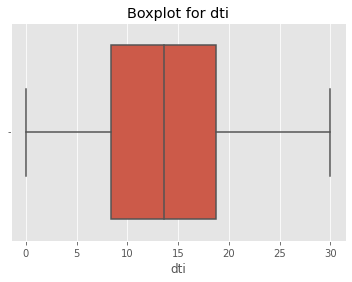

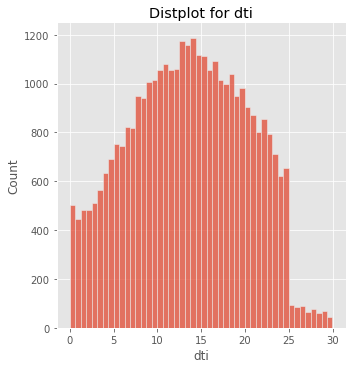

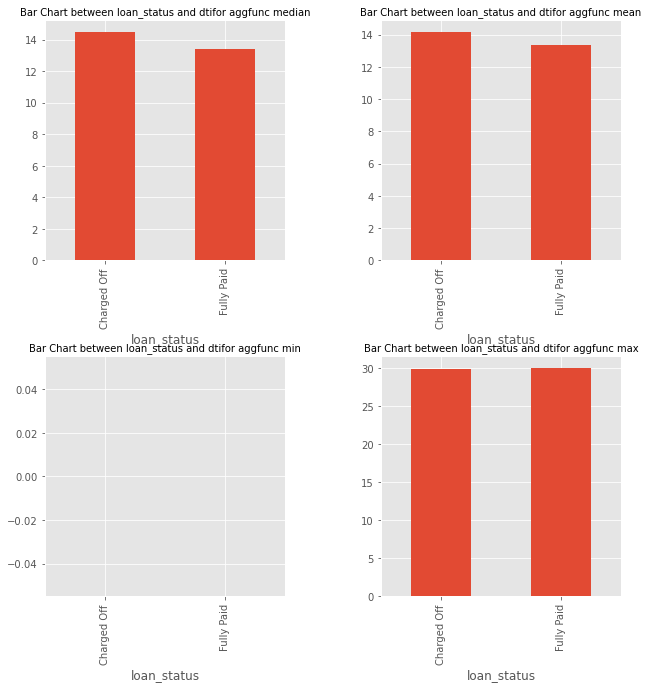

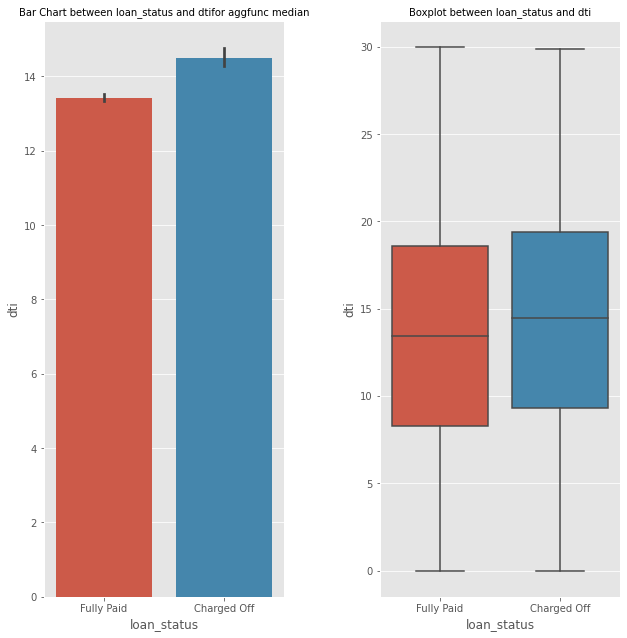

-----------------------------------------------------
Pivot table values with index as loan_status, column as dti and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VL      2 non-null      float64
 1   L       2 non-null      float64
 2   M       2 non-null      float64
 3   H       2 non-null      float64
 4   VH      2 non-null      float64
dtypes: float64(5)
memory usage: 96.0+ bytes
None
dti_bucket        VL         L          M          H         VH
count       2.000000  2.000000   2.000000   2.000000   2.000000
mean        4.235000  9.500000  13.580000  17.632500  22.365000
std         0.120208  0.028284   0.014142   0.045962   0.035355
min         4.150000  9.480000  13.570000  17.600000  22.340000
25%         4.192500  9.490000  13.575000  17.616250  22.352500
50%         4.235000  9.500000

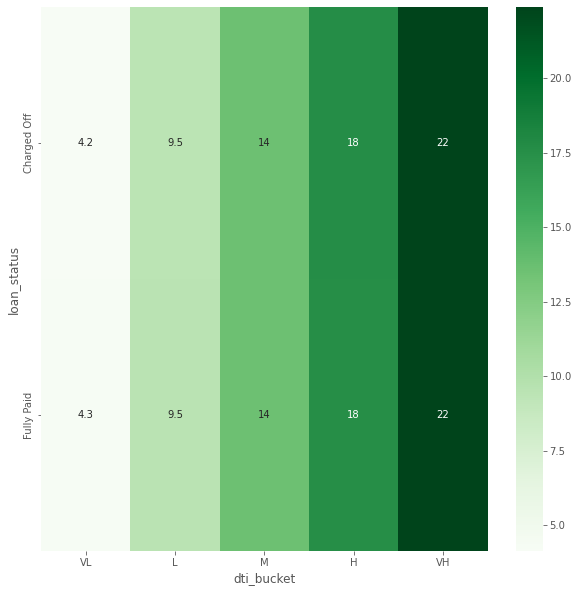

<Figure size 720x720 with 0 Axes>

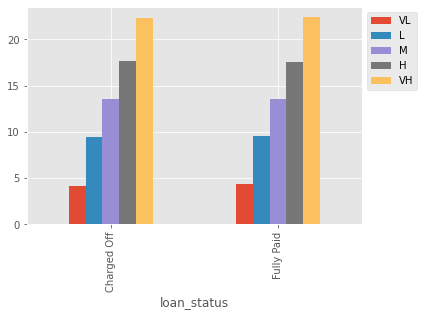

In [81]:
analyze_numerical(df,'dti')

Value Count for delinq_2yrs


0     31469
1      2930
2       604
3       190
4        53
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and delinq_2yrs


               count      mean       std  min  25%  50%  75%   max
loan_status                                                       
Charged Off   5035.0  0.167825  0.531710  0.0  0.0  0.0  0.0   8.0
Fully Paid   30250.0  0.142281  0.485759  0.0  0.0  0.0  0.0  11.0
-----------------------------------------------------
Value Count for groupby series of loan_status and delinq_2yrs


loan_status  delinq_2yrs
Charged Off  0               4423
             1                454
             2                113
             3                 27
             4                 12
             5                  3
             6                  1
             7                  1
        

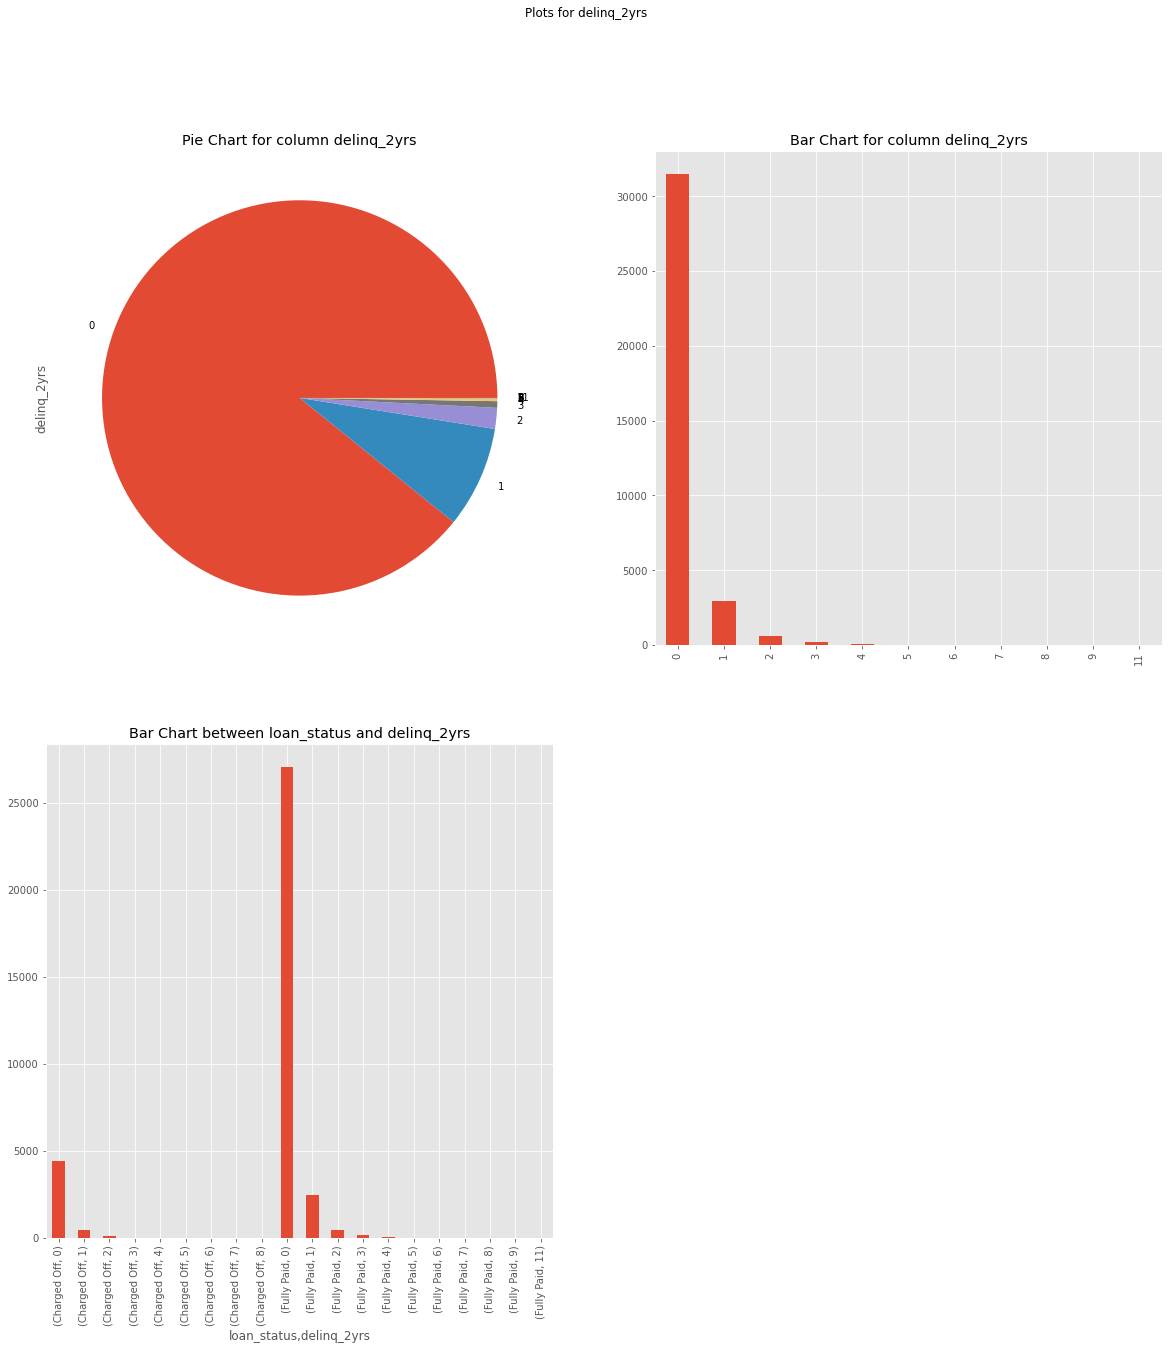

<Figure size 1440x1440 with 0 Axes>

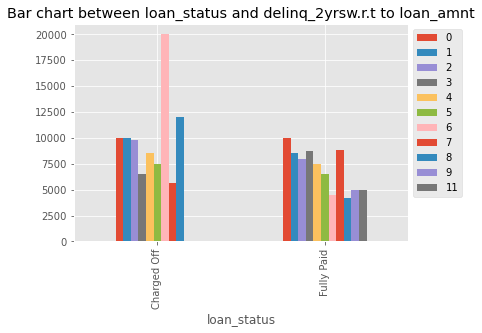

In [82]:
analyze_categorical(df,'delinq_2yrs',20,20)

In [83]:
df['inq_last_6mths'].value_counts()

0    17146
1     9761
2     5172
3     2702
4      278
5      130
6       55
7       31
8       10
Name: inq_last_6mths, dtype: int64

Value Count for inq_last_6mths


0    17146
1     9761
2     5172
3     2702
4      278
5      130
6       55
7       31
8       10
Name: inq_last_6mths, dtype: int64
-----------------------------------------------------
Describe for groupby values of loan_status and inq_last_6mths


               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5035.0  1.051043  1.145189  0.0  0.0  1.0  2.0  8.0
Fully Paid   30250.0  0.836628  1.048694  0.0  0.0  1.0  1.0  8.0
-----------------------------------------------------
Value Count for groupby series of loan_status and inq_last_6mths


loan_status  inq_last_6mths
Charged Off  0                  2043
             1                  1508
             2                   846
             3                   548
             4                    41
             5                    23
             6                    15
             7                     9
      

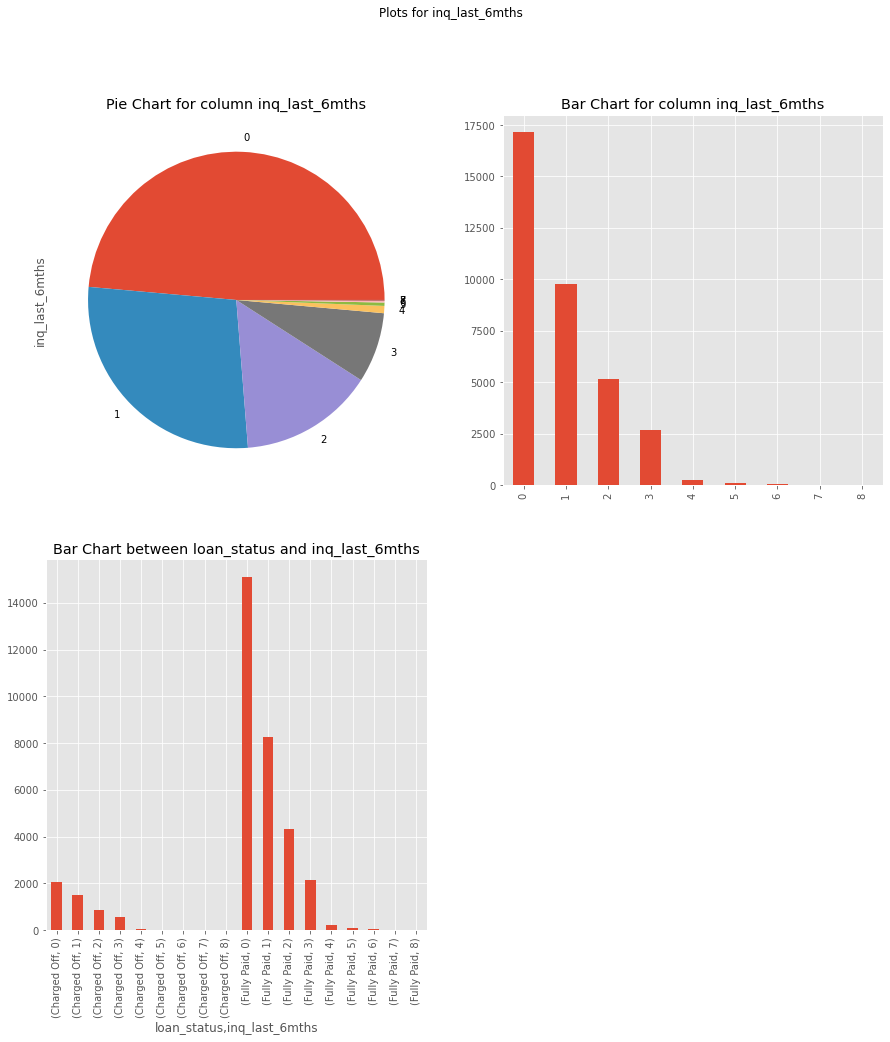

<Figure size 1080x1080 with 0 Axes>

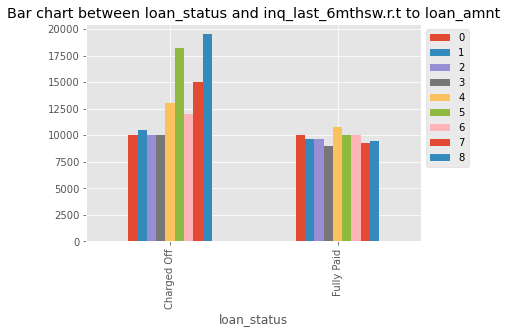

In [84]:
analyze_categorical(df,'inq_last_6mths')

Value Count for inq_last_6mths


0    17146
1     9761
2     5172
3     2702
4      278
5      130
6       55
7       31
8       10
Name: inq_last_6mths, dtype: int64
-----------------------------------------------------
Describe for inq_last_6mths


count    35285.000000
mean         0.867224
std          1.065625
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and inq_last_6mths


               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5035.0  1.051043  1.145189  0.0  0.0  1.0  2.0  8.0
Fully Paid   30250.0  0.836628  1.048694  0.0  0.0  1.0  1.0  8.0
-----------------------------------------------------


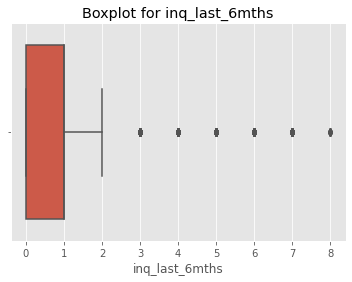

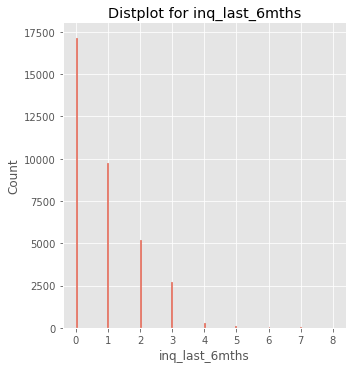

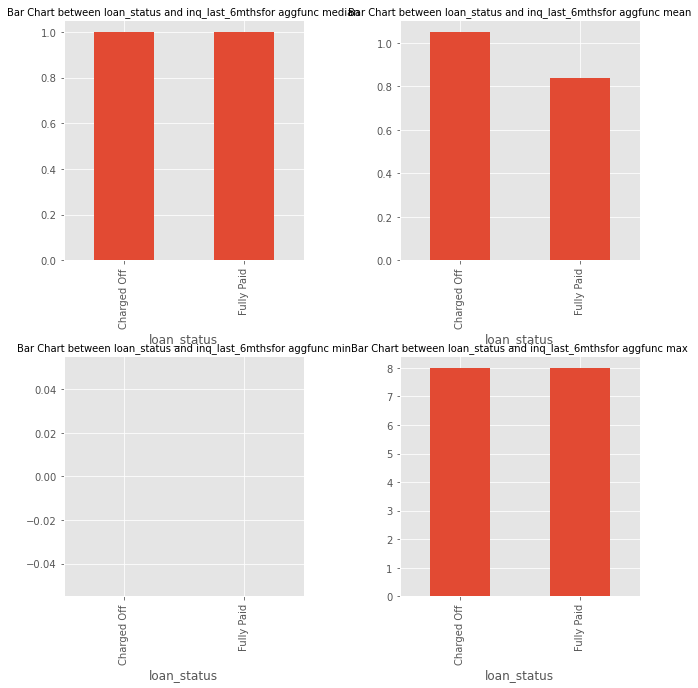

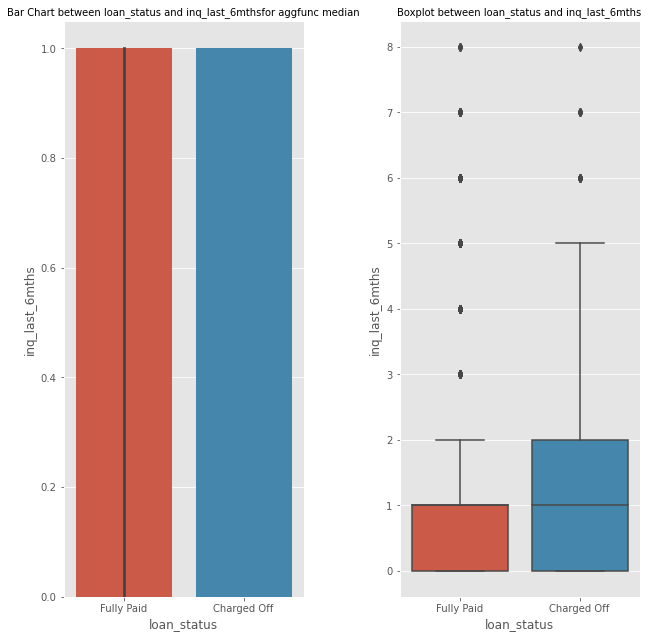

In [85]:
analyze_numerical(df,'inq_last_6mths',heatmap=False)

Value Count for open_acc


7     3633
8     3547
6     3527
9     3356
10    2882
5     2785
11    2468
12    2055
4     2008
13    1707
14    1322
3     1236
15    1062
16     842
17     654
18     481
2      455
19     352
20     259
21     217
22     125
23      84
24      64
25      52
26      23
28      22
27      20
30      13
29      11
34       5
31       5
35       3
33       3
36       2
32       2
39       1
38       1
44       1
Name: open_acc, dtype: int64
-----------------------------------------------------
Describe for open_acc


count    35285.000000
mean         9.336687
std          4.352288
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and open_acc


               count      mean       std  min  25%  50%   75%   max
loan_status                                               

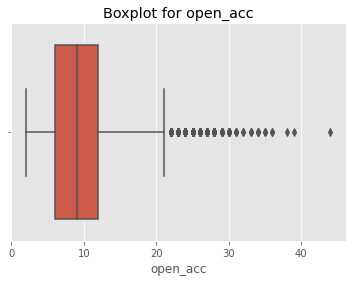

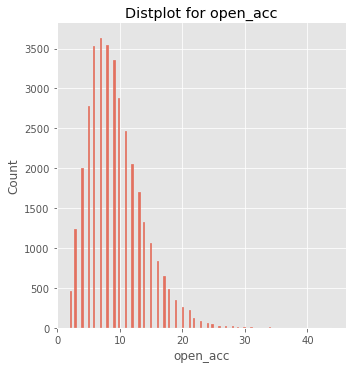

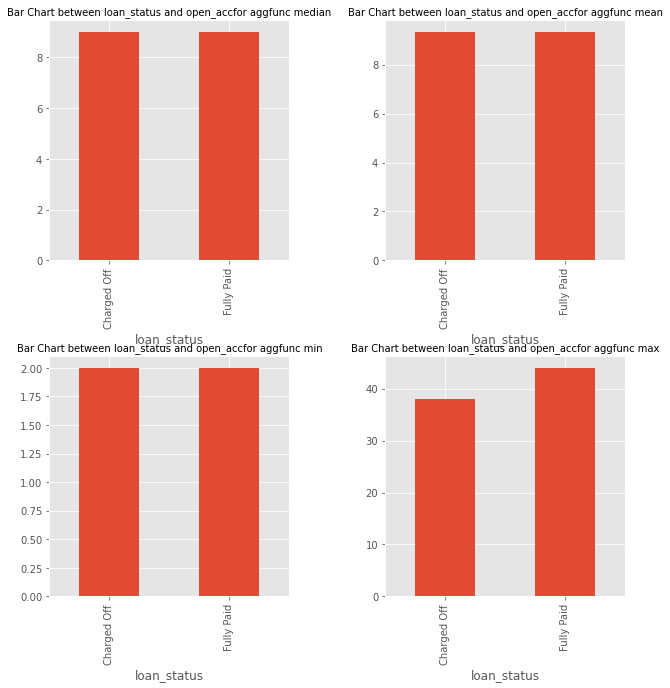

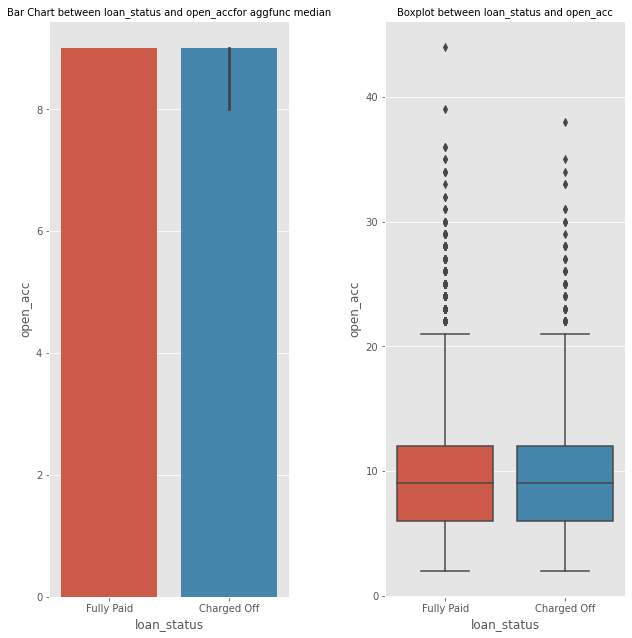

-----------------------------------------------------
Pivot table values with index as loan_status, column as open_acc and values of loan_amnt with aggfunc of median


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VL      2 non-null      int64
 1   L       2 non-null      int64
 2   M       2 non-null      int64
 3   H       2 non-null      int64
 4   VH      2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes
None
open_acc_bucket   VL    L    M     H    VH
count            2.0  2.0  2.0   2.0   2.0
mean             5.0  7.0  9.0  12.0  16.0
std              0.0  0.0  0.0   0.0   0.0
min              5.0  7.0  9.0  12.0  16.0
25%              5.0  7.0  9.0  12.0  16.0
50%              5.0  7.0  9.0  12.0  16.0
75%              5.0  7.0  9.0  12.0  16.0
max              5.0  7.0  9.0  12.0  16.0
open_acc_bucket  VL  L  M   H  VH
loan

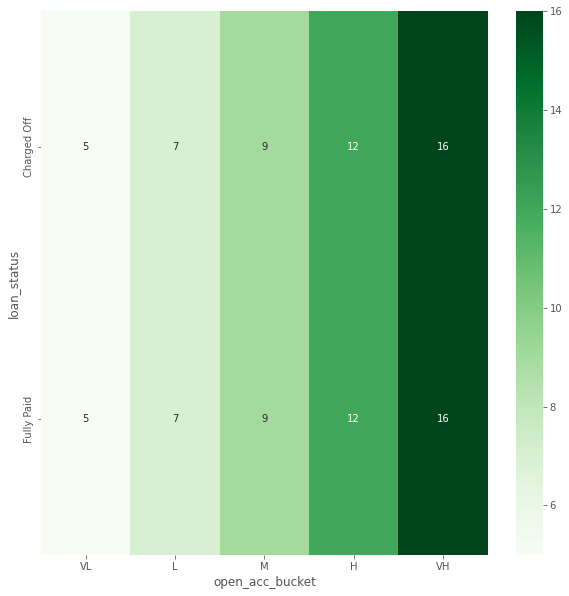

<Figure size 720x720 with 0 Axes>

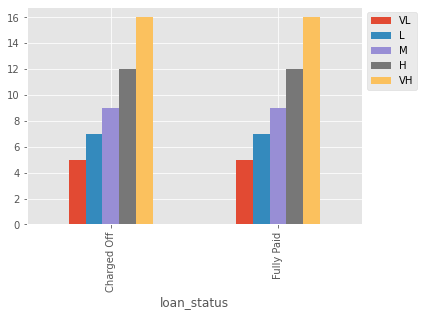

In [86]:
analyze_numerical(df,'open_acc')

Value Count for total_acc


15    1321
20    1317
16    1314
14    1307
17    1306
      ... 
78       1
72       1
87       1
77       1
2        1
Name: total_acc, Length: 81, dtype: int64
-----------------------------------------------------
Describe for total_acc


count    35285.000000
mean        22.243730
std         11.276588
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64
-----------------------------------------------------
Value Count for groupby series of loan_status and total_acc


               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   5035.0  21.848064  11.305267  2.0  13.0  20.0  29.0  74.0
Fully Paid   30250.0  22.309587  11.270646  3.0  14.0  21.0  29.0  90.0
-----------------------------------------------------


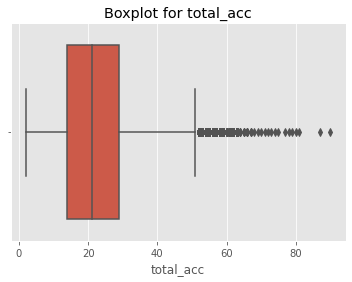

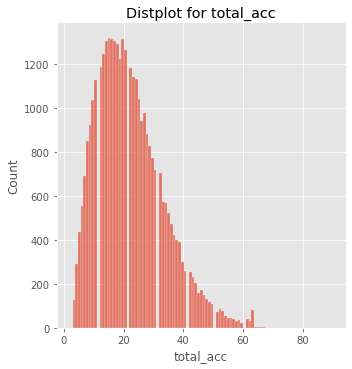

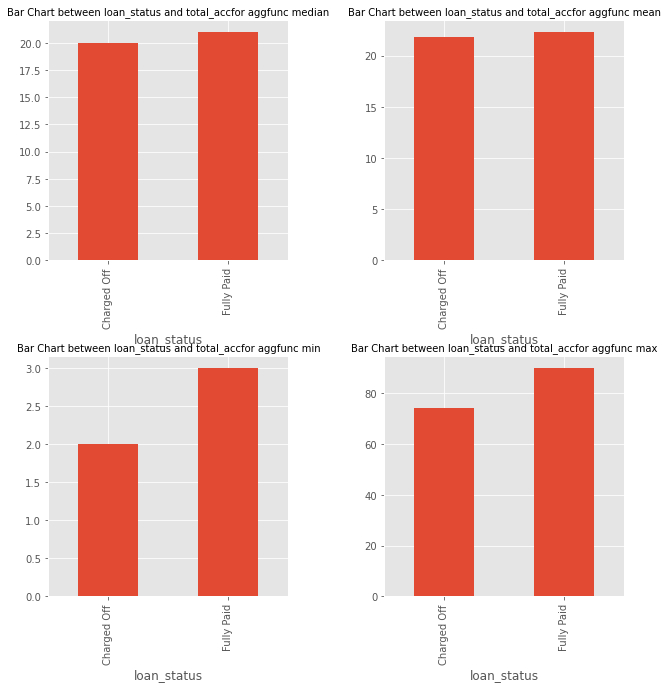

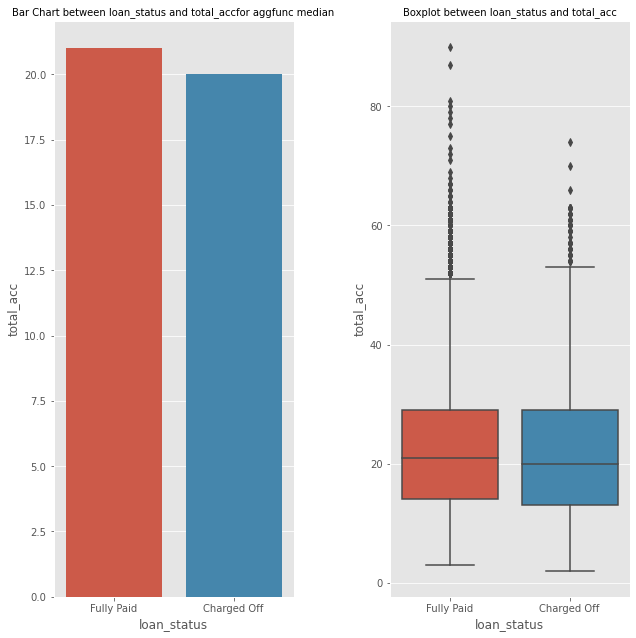

In [87]:
analyze_numerical(df,'total_acc',heatmap=False)

Numerical Columns = [loan_amnt,int_rate,installment,emp_length,annual_inc,dti,ecl_month,inq_last_6mnths,open_acc,pub_rec,total_acc,pub_rec_bankruptices]

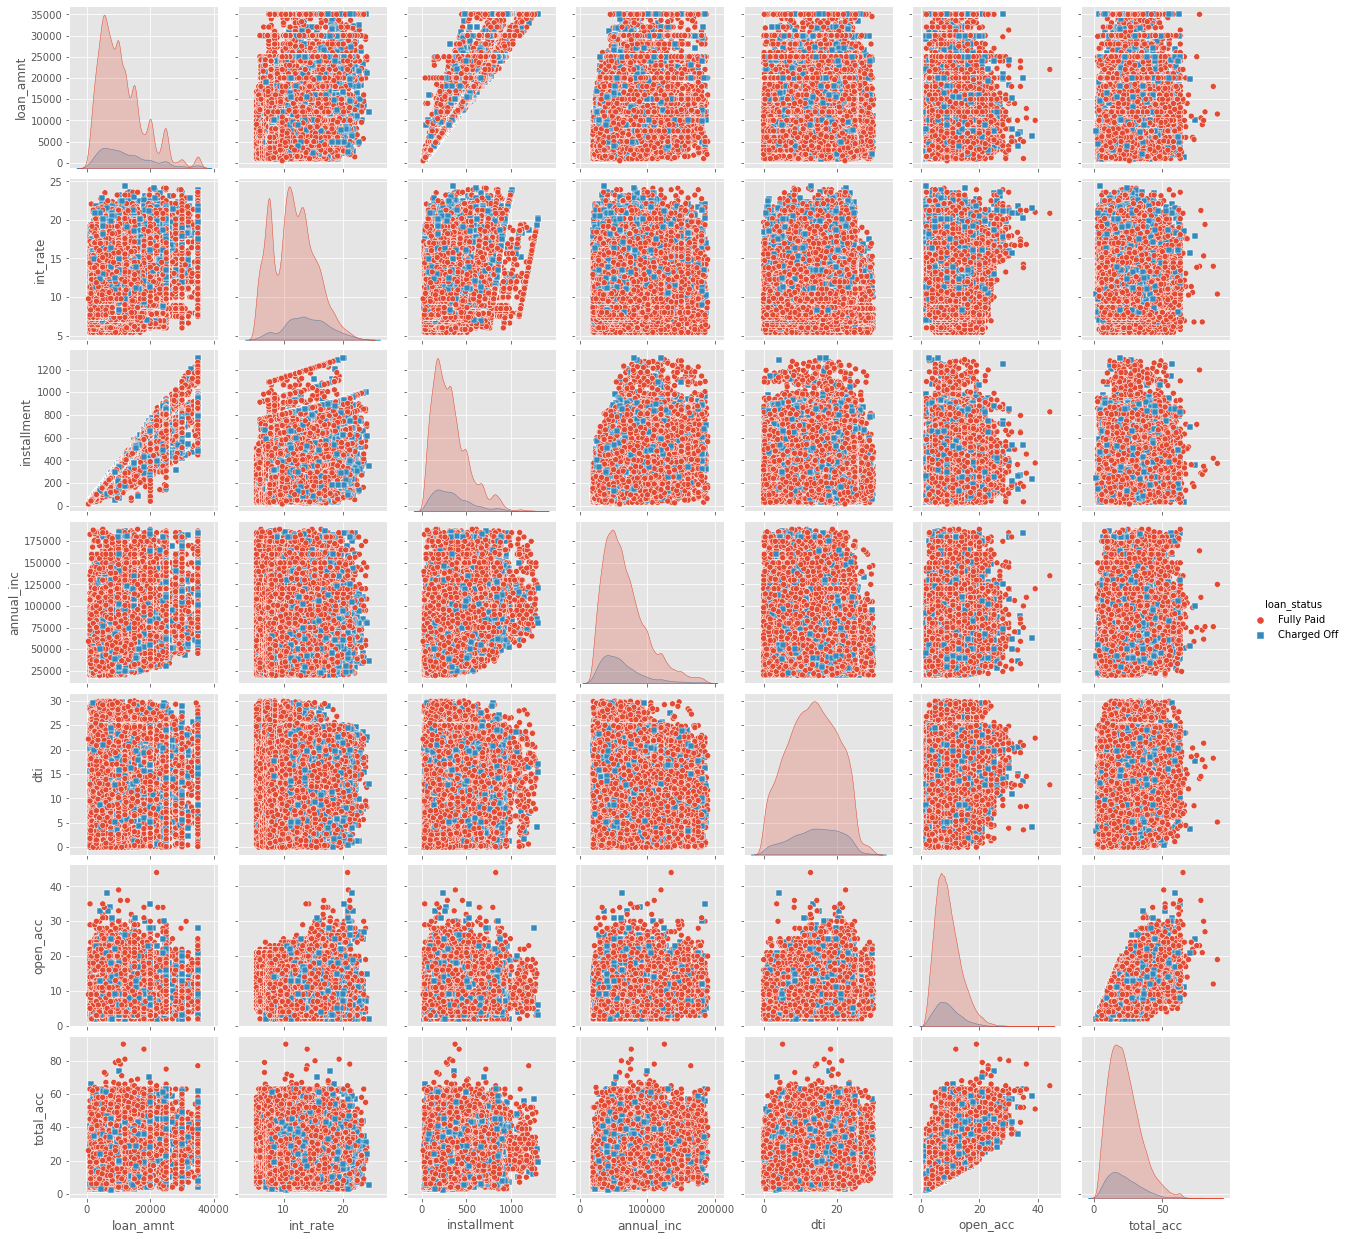

In [88]:
# sns.pairplot(df.[''])
# plt.show()
sns.pairplot(df, vars = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','total_acc'], hue ="loan_status", markers=["o", "s"])
plt.show()